In [1]:
from homeharvest import scrape_property
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import folium
import warnings

### 1. Scrape data from realtor.com using HomeHarvest real estate scraping library
I utilized the open-source HomeHarvest Python library to scrape housing listing data from realtor.com  <br>
Initially, I intended to gather data from Zillow using a third-party Zillow scraper API; however, due to restrictions on interacting with Zillow’s site from scraping data and limitations on the amount of listing pages data being fetched, it was complicated to work around these constraints and bypass them. Consequently, I chose to source data from realtor.com for greater accessibility and reliability.

- realtor website: https://www.realtor.com/
- HomeHarvest Python library: https://github.com/Bunsly/HomeHarvest

In [2]:
# current_timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
# filename = f"HomeHarvest_{current_timestamp}.csv"
# path = '../SayHomee/Data Science Challenge/'

# properties = scrape_property(
#   location="Los Angeles, CA",
#   listing_type="for_sale",  # or (for_sale, for_rent, pending)
#   past_days=90,  # sold in last 30 days - listed in last 30 days if (for_sale, for_rent)

#   # date_from="2023-05-01", # alternative to past_days
#   # date_to="2023-05-28",
#   # foreclosure=True
#   # mls_only=True,  # only fetch MLS listings
# )
# print(f"Number of properties: {len(properties)}")

# # Export to csv
# properties.to_csv(path + filename, index=False)
# print(properties.head())

In [57]:
# Using homeharvest package to fetch house listing from realtor.com
# current_timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
# filename = f"HomeHarvest_{current_timestamp}.csv"
# path = '../SayHomee/Data Science Challenge/'


# Define date ranges for 3-month periods
# date_ranges = [
#     ("2024-10-01", "2024-10-25"),
#     ("2024-07-01", "2024-09-30"),
#     ("2024-04-01", "2024-06-30")
# ]
# all_properties = []

# for date_from, date_to in date_ranges:
#     properties = scrape_property(
#         location="Los Angeles, CA",
#         listing_type="for_sale",
#         date_from=date_from,
#         date_to=date_to
#     )
    
#     properties_df = pd.DataFrame(properties)
#     print(f"Number of properties from {date_from} to {date_to}: {len(properties_df)}")
#     all_properties.append(properties_df)

# final_properties = pd.concat(all_properties, ignore_index=True)
# final_properties.to_csv(path + filename, index=False)
# print(final_properties.head())

### 2. Basic information about the dataset

This dataset contains house listing sale prices for Greater Los Angeles Area. As you can see from my chosen parameters, I scraped house listing for sale from 2024-04-01 till 2024-10-25. The dataset is scraped from realtor using HomeHarvest library. <br>

Along with list price (target/dv) it consists of other 56 house features:
Certainly! Here’s the general dataset description:
1. **property_url**: URL link to the listing on Realtor.com.
2. **property_id**: Unique identifier for each property.
3. **listing_id**: Unique ID for each listing instance.
4. **mls**: Multiple Listing Service (MLS) identifier, indicating the source MLS.
5. **mls_id**: MLS-specific ID for each listing.
6. **status**: Current status of the listing (e.g., "FOR_SALE").
7. **text**: Description of the property.
8. **style**: Style or type of the property (e.g., "MULTI_FAMILY," "SINGLE_FAMILY").
9. **full_street_line**: Full address line.
10. **street**
11. **unit**
12. **city**
13. **state**
14. **zip_code**
15. **beds**: Number of bedrooms.
16. **full_baths**: Number of full bathrooms.
17. **half_baths**: Number of half bathrooms.
18. **sqft**: Square footage of the interior living space.
19. **year_built**: Year the property was originally built.
20. **days_on_mls**: Number of days the property has been listed on the MLS.
21. **list_price**: Current listing price.
22. **list_price_min**: Minimum list price
23. **list_price_max**: maximum list price
24. **list_date**: Date when the property was listed.
25. **sold_price**: Price at which the property was last sold, if available.
26. **last_sold_date**: Date of the last sale of the property.
27. **assessed_value**: Tax-assessed value of the property.
28. **estimated_value**: Estimated market value of the property.
29. **new_construction**: Indicates if the property is a new construction.
30. **lot_sqft**: Square footage of the lot.
31. **price_per_sqft**: Price per square foot of the property.
32. **latitude**: Geographic coordinates
33. **longitude**: Geographic coordinates 
34. **neighborhoods**: Neighborhood information: e.g. Central LA, Silver Lake, Central LA, Hollywood Hills	
35. **county**: County where the property is located.
36. **fips_code**: FIPS (Federal Information Processing Standards) code for location.
37. **stories**: Number of stories in the building.
38. **hoa_fee**: Homeowners Association fee, if applicable.
39. **parking_garage**: Information on garage parking availability.
40. **agent_id**: Details of the listing agent
41. **agent_name**: Details of the listing agent
42. **agent_email**: Details of the listing agent
43. **agent_phones**: Details of the listing agent
44. **agent_mls_set**: Details of the listing agent
45. **broker_id**: Brokerage company info
46. **broker_name**: Brokerage company info
47. **builder_id**: Builder details
48. **builder_name**: Builder details
49. **office_id**: Info about real estate office managing the listing
50. **office_mls_set**: Info about real estate office managing the listing
51. **office_name**: Info about real estate office managing the listing
52. **office_email**: Info about real estate office managing the listing
53. **office_phones**: Info about the real estate office managing the listing.
54. **nearby_schools**: Nearby schools' information.
55. **primary_photo**: URLs to primary photos of the property.
56. **alt_photos**: URLs to alternate photos of the property.


### 3. Read in Dataset
This dataset provides a comprehensive view of property listings, with 9,690 entries and 57 columns, covering a wide array of property, location, and agent details.

In [58]:
final_properties = pd.read_csv("HomeHarvest_20241025_171737.csv")

pd.set_option('display.max_columns', None)
final_properties

,property_url,property_id,listing_id,mls,mls_id,status,text,style,full_street_line,street,unit,city,state,zip_code,beds,full_baths,half_baths,sqft,year_built,days_on_mls,list_price,list_price_min,list_price_max,list_date,sold_price,last_sold_date,assessed_value,estimated_value,new_construction,lot_sqft,price_per_sqft,latitude,longitude,neighborhoods,county,fips_code,stories,hoa_fee,parking_garage,agent_id,agent_name,agent_email,agent_phones,agent_mls_set,agent_nrds_id,broker_id,broker_name,builder_id,builder_name,office_id,office_mls_set,office_name,office_email,office_phones,nearby_schools,primary_photo,alt_photos
0,https://www.realtor.com/realestateandhomes-det...,2538363670,2974115255,MRCA,SB24220896,FOR_SALE,The subject property is a 6 unit apartment bui...,MULTI_FAMILY,9916 Beach St,9916 Beach St,NaN,Los Angeles,CA,90002,8.0000,6.0000,NaN,2836.0000,1923.0000,1,850000,NaN,NaN,2024-10-24,650000.0000,2017-10-23,696929.0000,1091000.0000,False,6648.0000,300.0000,33.9461,-118.2416,"South LA, Watts",Los Angeles,6037.0000,1.0000,NaN,NaN,NaN,Aaron Jacobson,aaron@lyonstahl.com,"[{'ext': None, 'primary': True, 'type': 'Mobil...",A-MRCA-SBJACOAAR,NaN,NaN,NaN,NaN,NaN,2746210.0000,O-MRCA-SB1310620,"Lyon Stahl Investment Re, Inc.",woodystahl@gmail.com,"[{'number': '3104259838', 'type': 'Office', 'p...",Inyo County Office Of Education School Distric...,http://ap.rdcpix.com/a57ffc450d12b21be6c039270...,http://ap.rdcpix.com/a57ffc450d12b21be6c039270...
1,https://www.realtor.com/realestateandhomes-det...,9207981409,2974115030,MRCA,SR24220864,FOR_SALE,2 lots side by side for the price of one lot! ...,LAND,99999 Highland Park,99999 Highland Park,NaN,Highland Park,CA,90042,NaN,NaN,NaN,NaN,NaN,1,184000,NaN,NaN,2024-10-24,NaN,NaN,NaN,NaN,False,12615.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2951245.0000,O-MRCA-FF7000748,"Pinnacle Estate Properties, In",simivalley@pinnacleestate.com,"[{'number': '8052227000', 'type': 'Office', 'p...",NaN,http://ap.rdcpix.com/f67990db464bf8d917948ea33...,http://ap.rdcpix.com/f67990db464bf8d917948ea33...
2,https://www.realtor.com/realestateandhomes-det...,1863678761,2974113311,WECA,24-456709,FOR_SALE,Back on Market! The front unit is now vacant. ...,MULTI_FAMILY,6017 S Fairfax Ave,6017 S Fairfax Ave,NaN,Los Angeles,CA,90056,4.0000,2.0000,NaN,2331.0000,1948.0000,1,1200000,NaN,NaN,2024-10-24,195000.0000,1986-12-16,358728.0000,1104033.0000,False,7933.0000,515.0000,33.9852,-118.3619,South LA,Los Angeles,6037.0000,1.0000,0.0000,4.0000,1972476.0000,Michelle Zoolalian,michellezoolalian@gmail.com,"[{'ext': None, 'primary': True, 'type': 'Mobil...",A-WECA-X57093,175516646.0000,2107942.0000,Compass,NaN,NaN,3761024.0000,O-WECA-X8146110,COMPASS,cristina@cristinawarfield.com,"[{'number': '3104489500', 'type': 'BUSINESS_MO...",Inglewood Unified School District,http://ap.rdcpix.com/6f485f358d50633e321c062c0...,http://ap.rdcpix.com/6f485f358d50633e321c062c0...
3,https://www.realtor.com/realestateandhomes-det...,2667901767,2974115007,WECA,24-450831,FOR_SALE,":: Architect Robert Lee, AIA, 1982 :: Set back...",CONDOS,2996 Hyperion Ave,2996 Hyperion Ave,NaN,Los Angeles,CA,90027,3.0000,3.0000,NaN,1585.0000,1982.0000,1,1295000,NaN,NaN,2024-10-24,1050000.0000,2018-07-16,1103735.0000,1256000.0000,False,13373.0000,817.0000,34.1106,-118.2692,"Central LA, Silver Lake",Los Angeles,6037.0000,2.0000,360.0000,2.0000,2688032.0000,Benjamin Kahle,ben@advantageestates.com,"[{'ext': None, 'primary': True, 'type': 'Offic...",A-WECA-C117098,NaN,2107942.0000,Compass,NaN,NaN,3761036.0000,O-WECA-X8146108,COMPASS,Mulliganbernard@compass.com,"[{'number': '3106526285', 'type': 'Office', 'p...",Los Angeles Unified School District,http://ap.rdcpix.com/2af1e2f36db97a0394a6a49e8...,http://ap.rdcpix.com/2af1e2f36db97a0394a6a49e8...
4,https://www.realtor.com/realestateandhomes-det...,1335662696,2974115258,WECA,24-456713,FOR_SALE,Nestled on a tranquil cul-de-sac in the Hollyw...,SINGLE_FAMILY,7709 Skyhill Dr,7709 Skyhill Dr

#### Initial Columns Dropping
- Dropping unnecessary columns that are not directly relevant to house price including mls_id, house photo, fips code, builder info, agent info, etc.

In [59]:
final_properties.columns

Index(['property_url', 'property_id', 'listing_id', 'mls', 'mls_id', 'status',
       'text', 'style', 'full_street_line', 'street', 'unit', 'city', 'state',
       'zip_code', 'beds', 'full_baths', 'half_baths', 'sqft', 'year_built',
       'days_on_mls', 'list_price', 'list_price_min', 'list_price_max',
       'list_date', 'sold_price', 'last_sold_date', 'assessed_value',
       'estimated_value', 'new_construction', 'lot_sqft', 'price_per_sqft',
       'latitude', 'longitude', 'neighborhoods', 'county', 'fips_code',
       'stories', 'hoa_fee', 'parking_garage', 'agent_id', 'agent_name',
       'agent_email', 'agent_phones', 'agent_mls_set', 'agent_nrds_id',
       'broker_id', 'broker_name', 'builder_id', 'builder_name', 'office_id',
       'office_mls_set', 'office_name', 'office_email', 'office_phones',
       'nearby_schools', 'primary_photo', 'alt_photos'],
      dtype='object')

In [60]:
df_listing = final_properties[['property_id', 'listing_id','status', 'style', 'city', 'state','zip_code', 'beds', 'full_baths', 'half_baths', 'sqft', 
 'year_built','days_on_mls', 'list_price', 'list_price_min', 'list_price_max','list_date', 'sold_price', 'last_sold_date', 
 'assessed_value','estimated_value','new_construction', 'lot_sqft', 'price_per_sqft', 'latitude', 'longitude','neighborhoods', 
 'county','stories', 'hoa_fee', 'parking_garage','nearby_schools']]

df_listing

,property_id,listing_id,status,style,city,state,zip_code,beds,full_baths,half_baths,sqft,year_built,days_on_mls,list_price,list_price_min,list_price_max,list_date,sold_price,last_sold_date,assessed_value,estimated_value,new_construction,lot_sqft,price_per_sqft,latitude,longitude,neighborhoods,county,stories,hoa_fee,parking_garage,nearby_schools
0,2538363670,2974115255,FOR_SALE,MULTI_FAMILY,Los Angeles,CA,90002,8.0000,6.0000,NaN,2836.0000,1923.0000,1,850000,NaN,NaN,2024-10-24,650000.0000,2017-10-23,696929.0000,1091000.0000,False,6648.0000,300.0000,33.9461,-118.2416,"South LA, Watts",Los Angeles,1.0000,NaN,NaN,Inyo County Office Of Education School Distric...
1,9207981409,2974115030,FOR_SALE,LAND,Highland Park,CA,90042,NaN,NaN,NaN,NaN,NaN,1,184000,NaN,NaN,2024-10-24,NaN,NaN,NaN,NaN,False,12615.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN
2,1863678761,2974113311,FOR_SALE,MULTI_FAMILY,Los Angeles,CA,90056,4.0000,2.0000,NaN,2331.0000,1948.0000,1,1200000,NaN,NaN,2024-10-24,195000.0000,1986-12-16,358728.0000,1104033.0000,False,7933.0000,515.0000,33.9852,-118.3619,South LA,Los Angeles,1.0000,0.0000,4.0000,Inglewood Unified School District
3,2667901767,2974115007,FOR_SALE,CONDOS,Los Angeles,CA,90027,3.0000,3.0000,NaN,1585.0000,1982.0000,1,1295000,NaN,NaN,2024-10-24,1050000.0000,2018-07-16,1103735.0000,1256000.0000,False,13373.0000,817.0000,34.1106,-118.2692,"Central LA, Silver Lake",Los Angeles,2.0000,360.0000,2.0000,Los Angeles Unified School District
4,1335662696,2974115258,FOR_SALE,SINGLE_FAMILY,Los Angeles,CA,90068,4.0000,3.0000,1.0000,2892.0000,1960.0000,1,2395000,NaN,NaN,2024-10-24,1980000.0000,2021-10-22,1980000.0000,2205200.0000,False,6291.0000,828.0000,34.1333,-118.3648,"Central LA, Hollywood Hills",Los Angeles,2.0000,0.0000,2.0000,Los Angeles Unified School District
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,2067908721,2967485986,FOR_SALE,MULTI_FAMILY,Los Angeles,CA,90004,6.0000,3.0000,NaN,2137.0000,1917.0000,161,1375000,NaN,NaN,2024-05-17,153000.0000,1994-09-14,541801.0000,1361000.0000,False,7505.0000,643.0000,34.0747,-118.3064,"Central LA, Wilshire Center - Koreatown",Los Angeles,1.0000,0.0000,2.0000,Los Angeles County Office Of Education School ...
9686,1947124971,2967422054,FOR_SALE,MULTI_FAMILY,Los Angeles,CA,90035,9.0000,6.0000,NaN,5145.0000,1955.0000,161,1700000,NaN,NaN,2024-05-17,NaN,NaN,204634.0000,NaN,False,6368.0000,330.0000,34.0554,-118.3791,"South Robertson, Pico - Robertson, Westside LA",Los Angeles,2.0000,0.0000,NaN,Los Angeles Unified School District
9687,2046547815,2967508018,FOR_SALE,CONDOS,Toluca Lake,CA,91602,2.0000,2.0000,NaN,1407.0000,1963.0000,161,645000,NaN,NaN,2024-05-17,554000.0000,2019-02-25,582246.0000,663425.0000,False,36694.0000,458.0000,34.1515,-118.3636,"South Valley, Greater Toluca Lake",Los Angeles,1.0000,759.0000,NaN,Los Angeles Unified School District
9688,9866572349,2967516563,FOR_SALE,LAND,Los Angeles,CA,90032,NaN,NaN,NaN,NaN,NaN,161,79888,NaN,NaN,2024-05-17,NaN,NaN,NaN,78742.0000,False,4572.0000,NaN,34.0764,-118.1970,"Lincoln Heights, Eastside LA",Los Angeles,NaN,0.0000,NaN,Los Angeles Unified School District


#### Dimensions of the drop-columns dataset:

In [61]:
shape = df_listing.shape
print('\n')
print('The number of rows presented in this dataset are {}'.format(shape[0]))
print('The number of columns presented in this dataset are {}'.format(shape[1]))
print('\n')



The number of rows presented in this dataset are 9690
The number of columns presented in this dataset are 32




### 4. Data Processing

#### 4.1 Converting Datatype for each column of the dataset

In [62]:
def convert_column_types(df):
    str_columns = ['property_id', 'listing_id','status', 'style', 'city', 'state', 'zip_code', 'neighborhoods', 'county', 'nearby_schools']
    datetime_columns = ['list_date', 'last_sold_date']
    numeric_columns = ['list_price', 'sold_price', 'sqft', 'assessed_value', 'estimated_value', 'lot_sqft', 'price_per_sqft', 
                     'latitude', 'longitude', 'hoa_fee', 'list_price_min', 'list_price_max',  'year_built','beds', 'full_baths', 
                     'half_baths', 'days_on_mls', 'stories', 'parking_garage']

    df['new_construction'] = df['new_construction'].astype(bool)
    for col in str_columns:
        df[col] = df[col].astype(str)

    for col in datetime_columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce', downcast='float')

    return df

df_listing = convert_column_types(df_listing)
# Data types of the columns
print('Converted Datatype Details For Each Column:\n----------------------------')
type_groups = {dtype: list(df_listing.columns[df_listing.dtypes == dtype]) for dtype in df_listing.dtypes.unique()}
for dtype, cols in type_groups.items():
    column_list = ', '.join(cols)
    print(f"{dtype}:\n{column_list}\n----------------------------")
    
warnings.filterwarnings('ignore')

Converted Datatype Details For Each Column:
----------------------------
object:
property_id, listing_id, status, style, city, state, zip_code, neighborhoods, county, nearby_schools
----------------------------
float32:
beds, full_baths, half_baths, sqft, year_built, days_on_mls, list_price, list_price_min, list_price_max, price_per_sqft, latitude, longitude, stories, hoa_fee, parking_garage
----------------------------
datetime64[ns]:
list_date, last_sold_date
----------------------------
float64:
sold_price, assessed_value, estimated_value, lot_sqft
----------------------------
bool:
new_construction
----------------------------


In [63]:
df_listing.describe(include='all')

,property_id,listing_id,status,style,city,state,zip_code,beds,full_baths,half_baths,sqft,year_built,days_on_mls,list_price,list_price_min,list_price_max,list_date,sold_price,last_sold_date,assessed_value,estimated_value,new_construction,lot_sqft,price_per_sqft,latitude,longitude,neighborhoods,county,stories,hoa_fee,parking_garage,nearby_schools
count,9690,9690,9690,9690,9690,9690,9690,9086.0000,8973.0000,1905.0000,9014.0000,8991.0000,9690.0000,9690.0000,0.0000,0.0000,9690,7903.0000,7904,8888.0000,8930.0000,9690,9464.0000,9014.0000,9644.0000,9644.0000,9690,9690,8772.0000,9082.0000,5774.0000,9690
unique,9424,9688,2,8,81,1,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,491,3,NaN,NaN,NaN,73
top,9597775209,2973031092,FOR_SALE,SINGLE_FAMILY,Los Angeles,CA,90046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,"South Valley, Encino",Los Angeles,NaN,NaN,NaN,Los Angeles Unified School District
freq,5,2,7548,4980,5322,9690,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9309,NaN,NaN,NaN,NaN,234,9681,NaN,NaN,NaN,6712
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.3946,3.5836,1.1323,2793.4399,1961.3461,62.7095,2165174.5000,NaN,NaN,2024-08-23 06:58:19.690402304,1013157.9231,2008-06-28 14:20:17.004048640,1041540.3060,1909237.0340,NaN,255690.5170,737.2166,34.0886,-118.3826,NaN,NaN,2.1398,209.0897,2.2856,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,1.0000,1.0000,100.0000,1880.0000,1.0000,1.0000,NaN,NaN,2024-04-01 00:00:00,3000.0000,1962-03-13 00:00:00,197.0000,11028.0000,NaN,179.0000,0.0000,33.7063,-118.6669,NaN,NaN,1.0000,0.0000,1.0000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0000,2.0000,1.0000,1338.0000,1936.0000,23.0000,769900.0000,NaN,NaN,2024-07-25 00:00:00,250000.0000,2001-01-22 18:00:00,284364.7500,778704.7500,NaN,5850.7500,487.0000,34.0290,-118.4576,NaN,NaN,1.0000,0.0000,2.0000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0000,2.0000,1.0000,1928.0000,1957.0000,49.0000,1199000.0000,NaN,NaN,2024-09-06 00:00:00,570000.0000,2014-02-27 00:00:00,574161.0000,1177000.0000,NaN,7514.0000,642.0000,34.0845,-118.3759,NaN,NaN,2.0000,0.0000,2.0000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0000,4.0000,1.0000,3120.0000,1983.0000,92.0000,2128000.0000,NaN,NaN,2024-10-02 00:00:00,1105000.0000,2019-12-12 06:00:00,1066217.7500,1986300.0000,NaN,17067.7500,861.0000,34.1627,-118.2953,NaN,NaN,2.0000,200.0000,2.0000,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0000,125.0000,11.0000,71765.0000,2025.0000,207.0000,195000000.0000,NaN,NaN,2024-10-24 00:00:00,60850000.0000,2024-02-28 00:00:00,92806826.0000,46062348.0000,NaN,1945128240.0000,10685.0000,34.5848,-117.9686,NaN,NaN,54.0000,39249.0000,123.0000,NaN


**Initial Summary of The Dataset Stats**:<br>
The dataset consists of 9,110 property listings, each with various details such as location, property characteristics, and pricing information. 
- The **average property size (sqft)** is approximately 2,784 sq. ft., with a median of 1,928 sq. ft., indicating some larger properties skewing the average. The **average** property has 4.39 bedrooms, 3.56 full bathrooms, and 0.24 half bathrooms.
- Properties have a **mean construction year** of 1961, with the oldest built in 1880 and the most recent in 2024. The listing prices range significantly from \\$1000 to a maximum of \\$195 million, with a median price of \\$1.2 million.
- The **average price** per square foot is \\$736.21, with significant variation (standard deviation of 464.95), indicating a wide range in property values per unit area.
- Properties are listed for an **average of 61 days** on the market, with some listed for as long as 207 days
- The dataset includes properties from **70 unique cities** within the greater Los Angeles area. There are also **117 unique zipcodes** represented, indicating geographic diversity within the dataset.
- Many properties include details about amenities, such as **HOA fees (average of \\$334.42)** and parking garage availability. **School district** information is also included, with the Los Angeles Unified School District being the most common.

#### 4.2 Null Values
Create a heatmap to visualize the columns with missing values and the density of the missing values

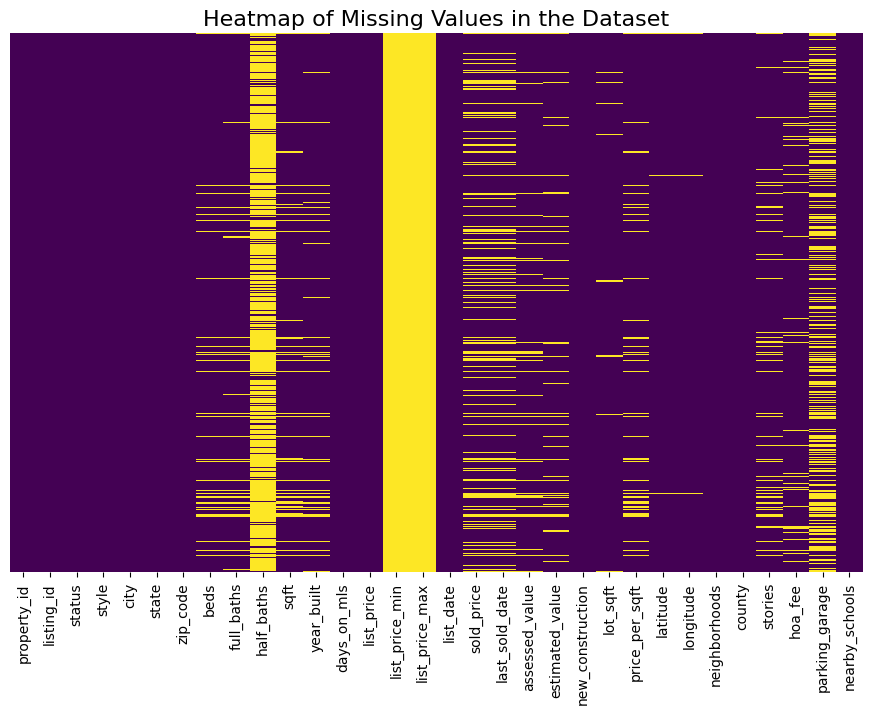

In [64]:
plt.figure(figsize=(11, 7))
sns.heatmap(df_listing.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values in the Dataset', fontsize=16)
plt.show()


#### Missing Values Imputation


**100% Nulls in 'list_price_min', 'list_price_min'**: 
- Dropping list_price_min and list_price_max because they have 100% null values

In [65]:
df_listing = df_listing.drop(columns = ['list_price_min', 'list_price_max'])
df_listing.columns

Index(['property_id', 'listing_id', 'status', 'style', 'city', 'state',
       'zip_code', 'beds', 'full_baths', 'half_baths', 'sqft', 'year_built',
       'days_on_mls', 'list_price', 'list_date', 'sold_price',
       'last_sold_date', 'assessed_value', 'estimated_value',
       'new_construction', 'lot_sqft', 'price_per_sqft', 'latitude',
       'longitude', 'neighborhoods', 'county', 'stories', 'hoa_fee',
       'parking_garage', 'nearby_schools'],
      dtype='object')

**Nulls in 'sqrt'**
- When exploring the dataset,  I observed that most records with missing values in the 'sqft' column are labeled as \<LAND\> in the 'style' attribute. Therefore, I decided to remove all records with \<LAND\> as they do not represent housing properties for sale and introduce noise due to large 'sqft' and 'list_price' values, but zeros in other key attributes.

In [66]:
# df_listing['sqft'].value_counts(dropna=False)
null_sqft = final_properties[final_properties['sqft'].isnull()]
null_sqft['style'].value_counts(dropna=False)

style
LAND             580
SINGLE_FAMILY     54
MULTI_FAMILY      24
MOBILE            13
CONDOS             4
TOWNHOMES          1
Name: count, dtype: int64

In [67]:
df_listing = df_listing[df_listing['style'] != 'LAND']

**Nulls in Other Columns**
- Using box plot to explore the distribution of other columns that contain NaN and evaluate how to impute the nulls for them

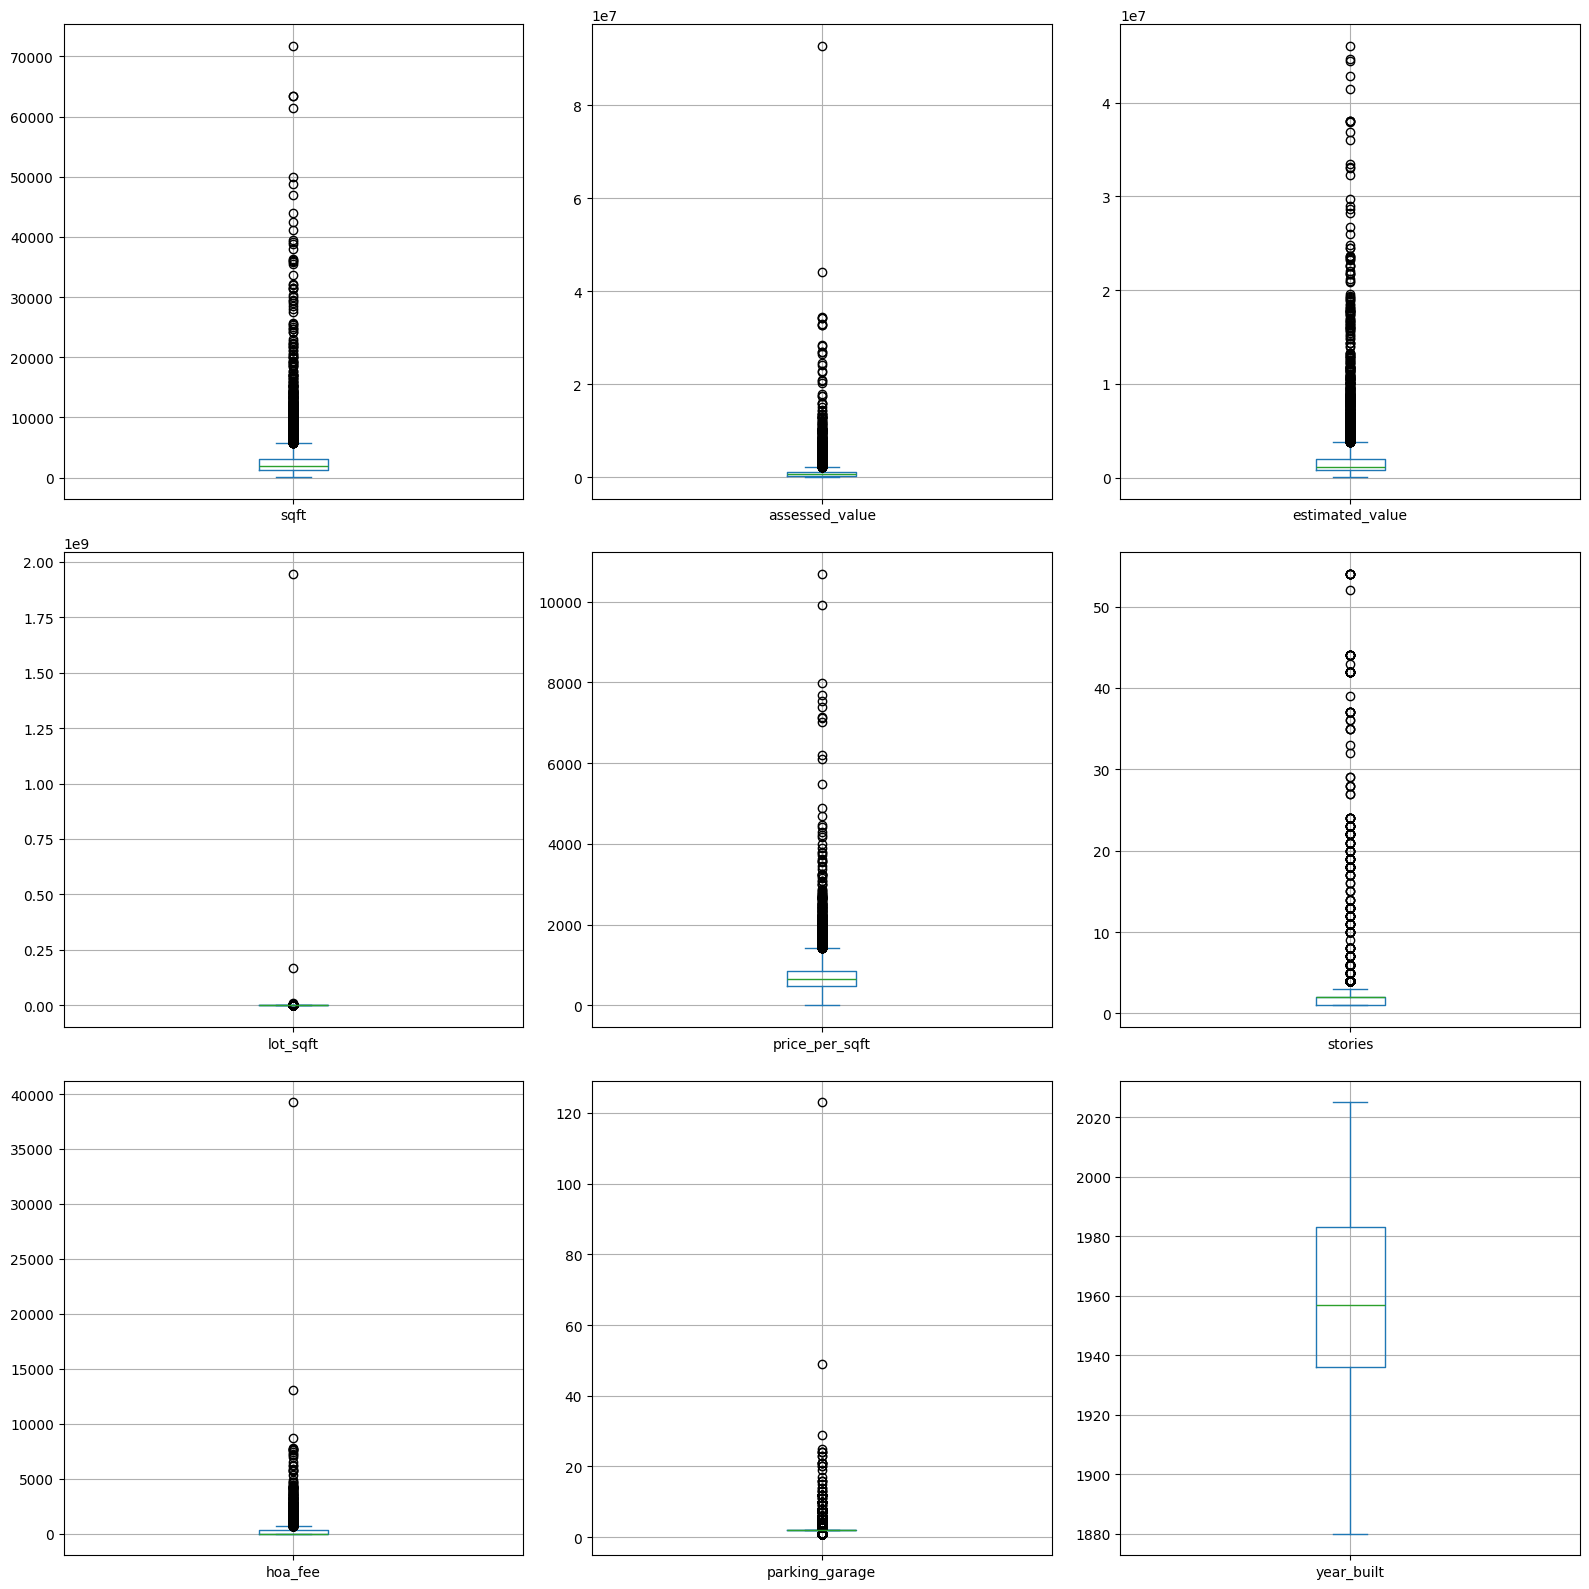

In [14]:
# Plot box chart
columns_to_plot = ['sqft', 'assessed_value', 'estimated_value', 'lot_sqft', 'price_per_sqft','stories','hoa_fee','parking_garage', 'year_built']
df_listing[columns_to_plot].plot(kind='box', subplots=True, layout=(3, 3), grid=True, figsize=(16,16))
plt.tight_layout()
plt.show()

Based on the box plots and analysis of columns containing missing values,  I chose different imputation strategies based on the characteristics of each column:
- **Fill with 0**: **half_baths** was filled with zero, as missing values here indicate the absence of half bathrooms.
- **Impute by Median**: Columns with numerical values, such as **beds, full_baths, sqft, assessed_value, estimated_value, lot_sqft, price_per_sqft, stories, hoa_fee, parking_garage, and year_built**, were imputed with their respective medians.
    - I chose to imput by median instead of mean because these columns contain significant outliers, as shown in the box plots. The median is less sensitive to extreme values than the mean, providing a more robust central measure that minimizes skewing effects from outliers. Using the mean could have led to imputed values that are unrepresentatively high or low due to the influence of these extreme values
- **Dropping Irrelevant or Redundant Columns**: Columns such as **latitude, longitude, sold_price, and last_sold_date** were removed from the dataset. Specifically:
    - **Dropping sold_price**: The sold_price column reflects the property’s last sale price, which may be outdated, especially for listings that last sold over 20–30 years ago. In many cases, the list_price is significantly higher than the sold_price due to appreciation over time. Therefore, list_price was selected as the dependent variable for modeling, as it provides a more current estimate of property value.


In [15]:
# Dropping latitude, longitude, sold_price, last_sold_date
df_listing = df_listing.drop(columns = ['latitude', 'longitude','sold_price','last_sold_date'])

# Missing values imputation by median
df_listing['beds'].fillna(df_listing['beds'].median(), inplace=True)
df_listing['full_baths'].fillna(df_listing['full_baths'].median(), inplace=True)
df_listing['sqft'].fillna(df_listing['sqft'].median(), inplace=True)
df_listing['assessed_value'].fillna(df_listing['sqft'].median(), inplace=True)
df_listing['estimated_value'].fillna(df_listing['sqft'].median(), inplace=True)
df_listing['lot_sqft'].fillna(df_listing['sqft'].median(), inplace=True)
df_listing['price_per_sqft'].fillna(df_listing['price_per_sqft'].median(), inplace=True)
df_listing['stories'].fillna(df_listing['sqft'].median(), inplace=True)
df_listing['hoa_fee'].fillna(df_listing['sqft'].median(), inplace=True)
df_listing['parking_garage'].fillna(df_listing['sqft'].median(), inplace=True)
df_listing['year_built'].fillna(df_listing['sqft'].median(), inplace=True)

# Fill missing half_baths with 0
df_listing['half_baths'].fillna(0, inplace=True)
warnings.filterwarnings('ignore')

Check missing values again with heatmap to ensure there are no missing values:

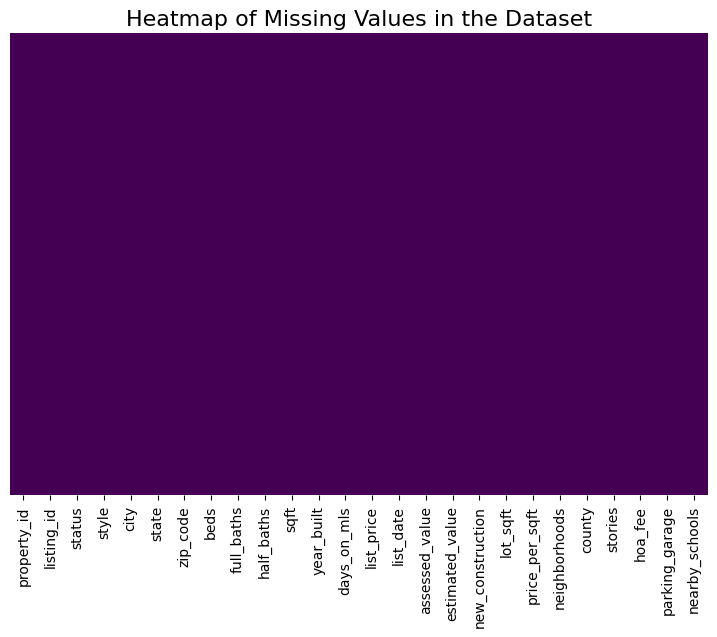

In [16]:
plt.figure(figsize=(9, 6))
sns.heatmap(df_listing.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values in the Dataset', fontsize=16)
plt.show()

In [17]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9110 entries, 0 to 9689
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   property_id       9110 non-null   object        
 1   listing_id        9110 non-null   object        
 2   status            9110 non-null   object        
 3   style             9110 non-null   object        
 4   city              9110 non-null   object        
 5   state             9110 non-null   object        
 6   zip_code          9110 non-null   object        
 7   beds              9110 non-null   float32       
 8   full_baths        9110 non-null   float32       
 9   half_baths        9110 non-null   float32       
 10  sqft              9110 non-null   float32       
 11  year_built        9110 non-null   float32       
 12  days_on_mls       9110 non-null   float32       
 13  list_price        9110 non-null   float32       
 14  list_date         9110 non-nu

### 5. Exploratory Data Analysis and Feature Processing

1. Utilizing folium Library to Create House Listing Heatmap
2. Process Duplicated property id
3. Process Categorical Variable
   - Ad-hoc transformation for specific categorical variables
   - Examining the ones to create dummy variable or ordinal variable
4. Process Numeric Data
   - Check Outliers
   - Normalization
   - Multicollinearity
5. One-hot Encoding for Categorical Variables

#### 5.1 Creating House Listing Heatmap Using folium
Visualizing the geospatial distribution of the number of house listings in Greater Los Angeles area:
- To to view the dynamic heat map, please use [this link](https://nbviewer.org/github/zxCyrus/SayHomee/blob/main/notebooks/SayHomee%20Data%20Sciencec%20Challenge.ipynb) by nbviewer.
- Reference: https://bytescout.com/blog/plotting-geographical-heatmaps-using-python-folium-library.html

In [18]:
# create a base map  latitude, longitude
basemap = folium.Map(location=[final_properties['latitude'].mean(),final_properties['longitude'].mean()], zoom_start = 9)

# add heatmap
coordinate_copy = final_properties[['latitude','longitude']].copy()
coordinate_copy['count'] = 1
HeatMap(data = coordinate_copy.groupby(['latitude','longitude']).sum().reset_index().values.tolist()
                       , radius=8, max_zoom=13, name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed = False).add_to(basemap) # turn off the heatmap toggle
basemap # render the map


#### 5.2 Processing Duplicates in property_id
Filtering out duplicate entries in property_id due to changes in property status (e.g., from "pending" to "for-sale" or vice versa). To retain a unique record for each property, I selected the entry id with the most recent date and "pending" status, as this typically indicates the most updated pricing with the actual sale or listing price.
- PENDING status = a seller has accepted an offer on their property, but the sale is not yet complete

In [19]:
df_listing['property_id'].value_counts(dropna=False)

property_id
9597775209    5
1250240474    4
2912376041    4
9868530489    4
1235836558    3
             ..
1455533935    1
1738497385    1
2248971340    1
2754541934    1
2137678789    1
Name: count, Length: 8877, dtype: int64

In [20]:
def filter_property_id(df):
    
    df.loc[:, 'list_date'] = pd.to_datetime(df['list_date'])
    status_order = {'PENDING': 0, 'FOR_SALE': 1}
    df.loc[:, 'status_order'] = df['status'].map(status_order)
    df_sorted = df.sort_values(by=['property_id', 'list_date', 'status_order'], ascending=[True, False, True])
    df_filtered = df_sorted.drop_duplicates(subset='property_id', keep='first')
    df_filtered = df_filtered.drop(columns=['status_order'])
    
    return df_filtered

df_filtered = filter_property_id(df_listing)
# df_filtered

After filtering, the dataset have 8877 unique data records remained

In [21]:
df_filtered.describe(include='all')

,property_id,listing_id,status,style,city,state,zip_code,beds,full_baths,half_baths,sqft,year_built,days_on_mls,list_price,list_date,assessed_value,estimated_value,new_construction,lot_sqft,price_per_sqft,neighborhoods,county,stories,hoa_fee,parking_garage,nearby_schools
count,8877,8877,8877,8877,8877,8877,8877,8877.000000,8877.000000,8877.000000,8877.000000,8877.000000,8877.000000,8.877000e+03,8877,8.877000e+03,8.877000e+03,8877,8.877000e+03,8877.000000,8877,8877,8877.000000,8877.000000,8877.000000,8877
unique,8877,8877,2,7,70,1,117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,487,2,NaN,NaN,NaN,69
top,1000087255,2974112495,FOR_SALE,SINGLE_FAMILY,Los Angeles,CA,90046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,"South Valley, Encino",Los Angeles,NaN,NaN,NaN,Los Angeles Unified School District
freq,1,1,6811,4885,4847,8877,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8519,NaN,NaN,227,8874,NaN,NaN,NaN,6216
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.374113,3.554129,0.239946,2785.687744,1960.996338,60.986145,2.222088e+06,2024-08-25 00:19:57.161203200,9.966556e+05,1.831242e+06,NaN,2.666618e+05,738.549500,NaN,NaN,72.875412,333.561127,703.626587,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,100.000000,1880.000000,1.000000,1.000000e+00,2024-04-01 00:00:00,1.928000e+03,1.928000e+03,NaN,6.310000e+02,0.000000,NaN,NaN,1.000000,0.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,1339.000000,1933.000000,22.000000,7.990000e+05,2024-07-29 00:00:00,2.460680e+05,7.400000e+05,NaN,5.729000e+03,490.000000,NaN,NaN,1.000000,0.000000,2.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,0.000000,1928.000000,1957.000000,47.000000,1.200000e+06,2024-09-08 00:00:00,5.451050e+05,1.126100e+06,NaN,7.502000e+03,642.000000,NaN,NaN,2.000000,0.000000,2.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,0.000000,3100.000000,1982.000000,88.000000,2.195000e+06,2024-10-03 00:00:00,1.029176e+06,1.936800e+06,NaN,1.700000e+04,860.000000,NaN,NaN,2.000000,440.000000,1928.000000,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.000000,125.000000,11.000000,71765.000000,2025.000000,207.000000,1.950000e+08,2024-10-24 00:00:00,9.280683e+07,4.606235e+07,NaN,1.945128e+09,10685.000000,NaN,NaN,1928.000000,39249.000000,1928.000000,NaN


#### 5.3 Categorical Data & Non-Numerical Data
All non-numerical data include: <br>
- Bool: new_construction
- Categorical: status, style, city, neighborhoods, county, nearby_schools
- Variables to drop: property_id, listing_id, state, list_date, zip_code

**i) Boolean**

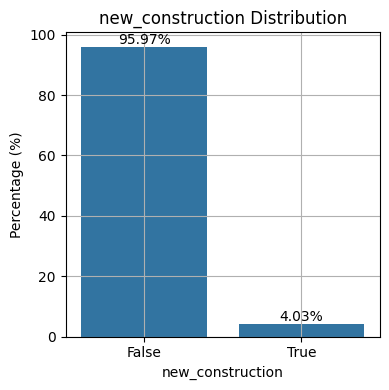

In [22]:
# Check boolean variable distribution
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(
    x=df_filtered['new_construction'].value_counts(normalize=True).index,
    y=df_filtered['new_construction'].value_counts(normalize=True) * 100,
    ax=ax
)
ax.set_title("new_construction Distribution")
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("new_construction")
ax.bar_label(ax.containers[0], fmt="%.2f%%")
ax.grid(True)
plt.tight_layout()
plt.show()

##### Explore: Can a house sell more if it's new constructure?

new_construction
False    1199000.0
True     3044997.5
Name: list_price, dtype: float32


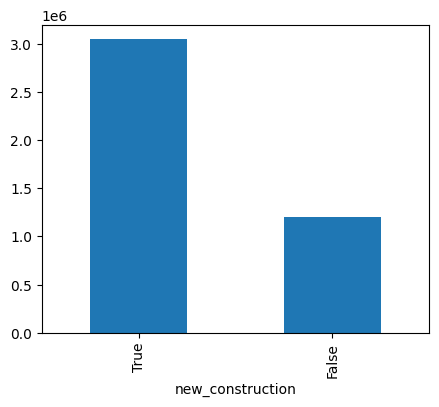

In [23]:
list_price_construction_med = df_filtered.groupby("new_construction")['list_price'].median()
print(list_price_construction_med)
list_price_construction_med.sort_values(ascending = False).plot.bar(figsize=(5,4))
plt.show()

- The pattern makes sense as house with new construction can sell a better price.

##### Converting boolean variables (new_construction) to binary

In [24]:
df_filtered['new_construction'] = df_filtered['new_construction'].astype(int)
# df_filtered['new_construction'].value_counts()

**ii) Other Categorical Variables**<br>
Exploring other categorical variables in the dataset, and how are they related to house price. 
- Other categorical variables: status, style, city, neighborhoods, county, nearby_schools

In [25]:
df_filtered[['status', 'style','city','neighborhoods','county','nearby_schools']]

,status,style,city,neighborhoods,county,nearby_schools
23,FOR_SALE,MULTI_FAMILY,Los Angeles,"Echo Park, Central LA",Los Angeles,Los Angeles Unified School District
5602,PENDING,SINGLE_FAMILY,Los Angeles,"South LA, Leimert Park",Los Angeles,"Los Angeles Unified School District, Libertas ..."
7112,FOR_SALE,SINGLE_FAMILY,Los Angeles,"Hollywood Hills West, Central LA",Los Angeles,Los Angeles Unified School District
1733,PENDING,SINGLE_FAMILY,Los Angeles,"West Adams, South LA",Los Angeles,Los Angeles Unified School District
2278,FOR_SALE,MULTI_FAMILY,Los Angeles,"Vermont Square, South LA",Los Angeles,Los Angeles Unified School District
...,...,...,...,...,...,...
9672,FOR_SALE,CONDOS,Los Angeles,"Westside LA, Century City, Westside",Los Angeles,Los Angeles Unified School District
1385,FOR_SALE,CONDOS,Los Angeles,"Central LA, Victor Heights, Historic Cultural",Los Angeles,Los Angeles Unified School District
6928,FOR_SALE,SINGLE_FAMILY,Sherman Oaks,"South Valley, Sherman Oaks",Los Angeles,Los Angeles County Office Of Education School ...
1718,FOR_SALE,SINGLE_FAMILY,Toluca Lake,"South Valley, Studio City",Los Angeles,Los Angeles Unified School District


**Encoding 'nearby_schools'**

In [26]:
df_filtered['nearby_schools'].value_counts()

nearby_schools
Los Angeles Unified School District                                                                                                            6216
Los Angeles County Office Of Education School District, Los Angeles Unified School District                                                     990
New West Charter District, Los Angeles Unified School District                                                                                  502
PUC Triumph CHRTR Academy & PUC Triumph CHRTR High District, Los Angeles Unified School District                                                 80
Los Angeles County Office Of Education School District, New West Charter District, Los Angeles Unified School District                           78
                                                                                                                                               ... 
ISANA Achernar Academy District, Compton Unified School District                                 

#### Apply Count Encoding (Number of Districts) to nearby_schools
- Count the number of school districts associated with each property and use that as a feature

In [27]:
# Count the number of school districts for each property
df_filtered['school_count'] = df_filtered['nearby_schools'].str.split(',').apply(lambda x: len(x) if isinstance(x, list) else 0)
df_filtered['school_count'].describe()

count    8877.000000
mean        1.348654
std         0.617267
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: school_count, dtype: float64

**Explore relationship of list_price vs. Number of school**

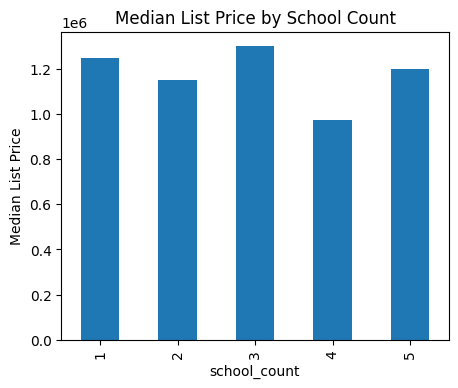

In [28]:
# Sort the data by school_count in ascending order before plotting
list_price_construction_med = df_filtered.groupby("school_count")['list_price'].median().sort_index()

# Plot the sorted bar chart
list_price_construction_med.plot(kind='bar', figsize=(5, 4))
plt.xlabel('school_count')
plt.ylabel('Median List Price')
plt.title('Median List Price by School Count')
plt.show()


**'status', 'style', 'city', 'neighborhoods', 'county'** <br>
Now, reviwing the percentage distribution of each category in other categorical variables other than nearby_school

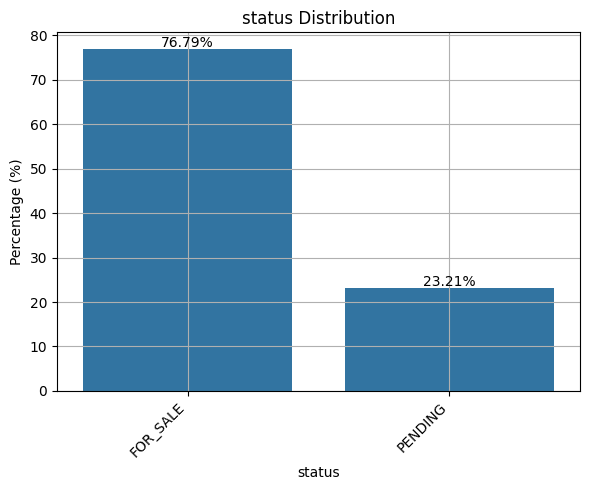

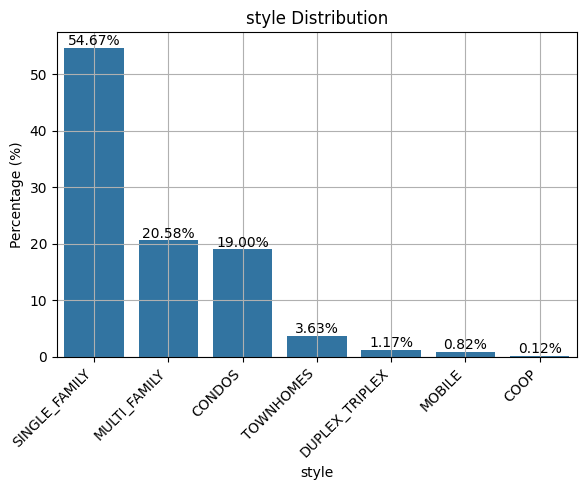

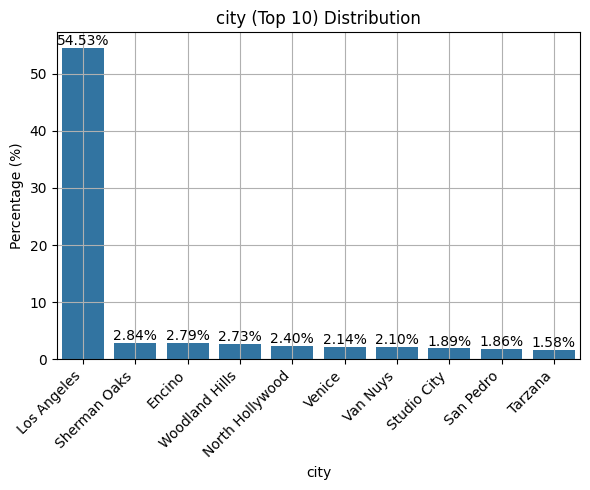

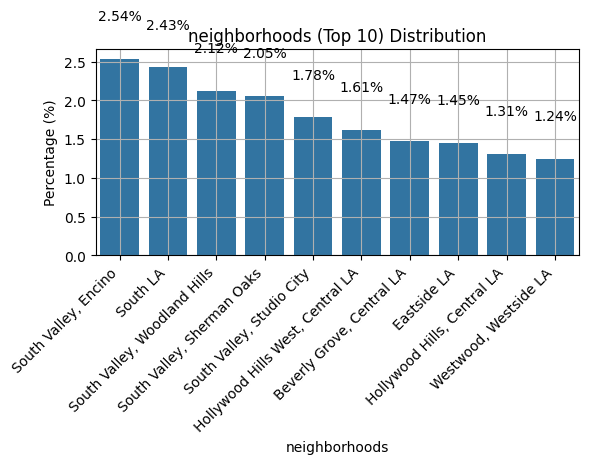

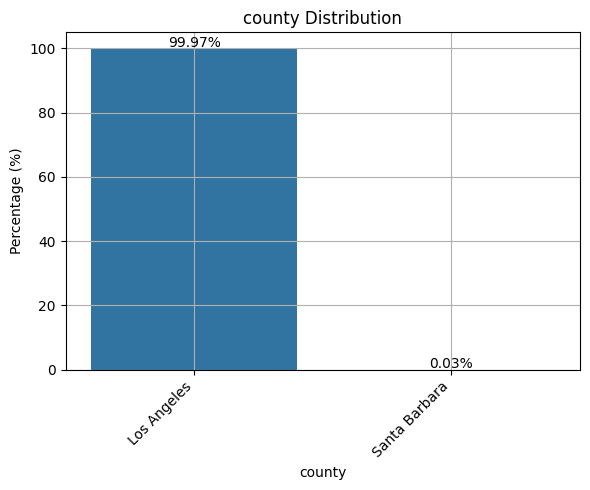

In [29]:
# Define the categorical columns to analyze
categorical_columns = ['status', 'style', 'city', 'neighborhoods', 'county']

# Set up the plotting space for each category
for col in categorical_columns:
    # Limit to top 10 categories for 'neighborhoods' and 'nearby_schools' due to high cardinality
    if col in ['neighborhoods', 'nearby_schools', 'city']:
        value_counts = df_listing[col].value_counts(normalize=True).nlargest(10) * 100
        title = f"{col} (Top 10) Distribution"
    else:
        value_counts = df_listing[col].value_counts(normalize=True) * 100
        title = f"{col} Distribution"
    
    # Plot the bar chart
    plt.figure(figsize=(6, 5))
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel("Percentage (%)")

    # Add percentage labels on top of the bars
    for index, value in enumerate(value_counts):
        plt.text(index, value + 0.5, f"{value:.2f}%", ha='center')
    
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


**Summary of Actions**:
-  **One-hot Encoding**: Will conduct one-hot encoding for 'status', 'style', 'county' because the number of value categories in them is relatively low.
-  **Feature Transofrmation**: 'neighborhoods'- Due to the large amount of unique categories in 'neighborhoods', I will perform special transformation and add value to them so that I can use it in the regression model
-  **Feature to be Dropped**: 'city' - Due to the large amount of unique categories in 'city', I will drop it because it gives the same information as 'neighborhoods'

#### Transforming neighborhoods into primary_neighborhood
Transforming neighborhoods to keep only the most frequent neighborhood from each entry in the neighborhoods column. I will drop neighborhoods after finishing deriving primary_neighborhood.

In [30]:
df_filtered['neighborhoods'].value_counts(dropna=False)

neighborhoods
South Valley, Encino                                               227
South LA                                                           211
South Valley, Woodland Hills                                       191
South Valley, Sherman Oaks                                         185
South Valley, Studio City                                          161
                                                                  ... 
Silicon Beach, Marina del Rey, The Venice del Rey                    1
Central LA, Greater Wilshire, Larchmont                              1
Encino, The Encino, South Valley                                     1
Carthay, Carthay Square, Central LA                                  1
Fairfax District, Central LA, Beverly Fairfax Historic District      1
Name: count, Length: 487, dtype: int64

In [31]:
# Create a new column with the most frequent neighborhood in each row
all_neighborhoods = df_filtered['neighborhoods'].str.split(',').explode().str.strip()
neighborhood_counts = all_neighborhoods.value_counts()
df_filtered['primary_neighborhood'] = df_filtered['neighborhoods'].apply(
    lambda x: max(x.split(','), key=lambda n: neighborhood_counts[n.strip()]).strip()
)

# replace NaN in primary_neighborhood with its city name
df_filtered['primary_neighborhood'] = np.where(
    (df_filtered['primary_neighborhood']=='nan'), 
    df_filtered['city'], 
    df_filtered['primary_neighborhood']
)
# df_filtered['primary_neighborhood'].value_counts(dropna=False)

Checking distribution for primary_neighborhood:

Text(0.5, 0, 'Percentage (%)')

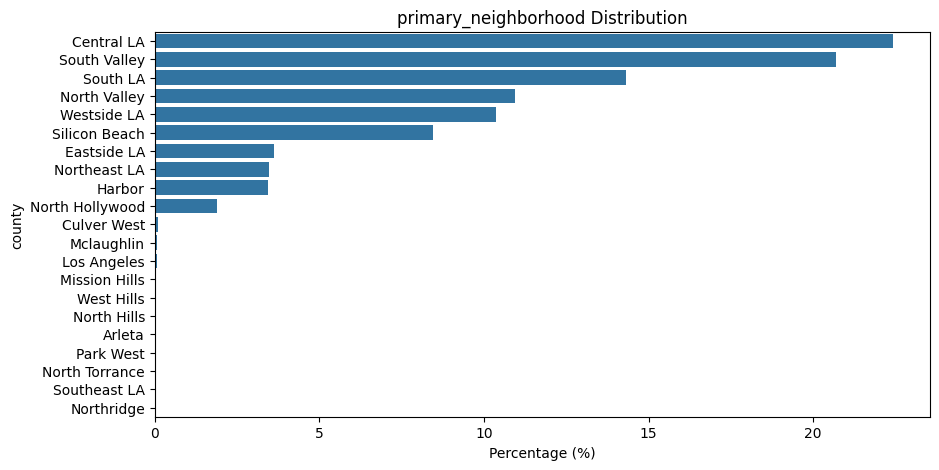

In [32]:
# Plot the bar chart for primary_neighborhood
value_counts = df_filtered['primary_neighborhood'].value_counts(normalize=True) * 100
title = f"{'primary_neighborhood'} Distribution"
plt.figure(figsize=(10, 5))
sns.barplot(x=value_counts.values, y=value_counts.index)
plt.title(title)
plt.ylabel(col)
plt.xlabel("Percentage (%)")

#### One-hot Encoding for status, style, primary_neighborhood, county
- Will be conducted right before the modeling step

#### Droping the remaining variables
Droping property_id, listing_id, state, list_date, zip_code, city, state, neighborhoods, nearby_schools

In [33]:
df_filtered = df_filtered.drop(columns=['property_id','listing_id','state','list_date','zip_code',
                                      'city','state','neighborhoods','nearby_schools', 'county'])

Next, I am going to explore and process the numerical variables. 

#### 5.4 Numeric Data
##### Outliers
Use the box plot and histogram to visualize the distribution of each numeric variable:

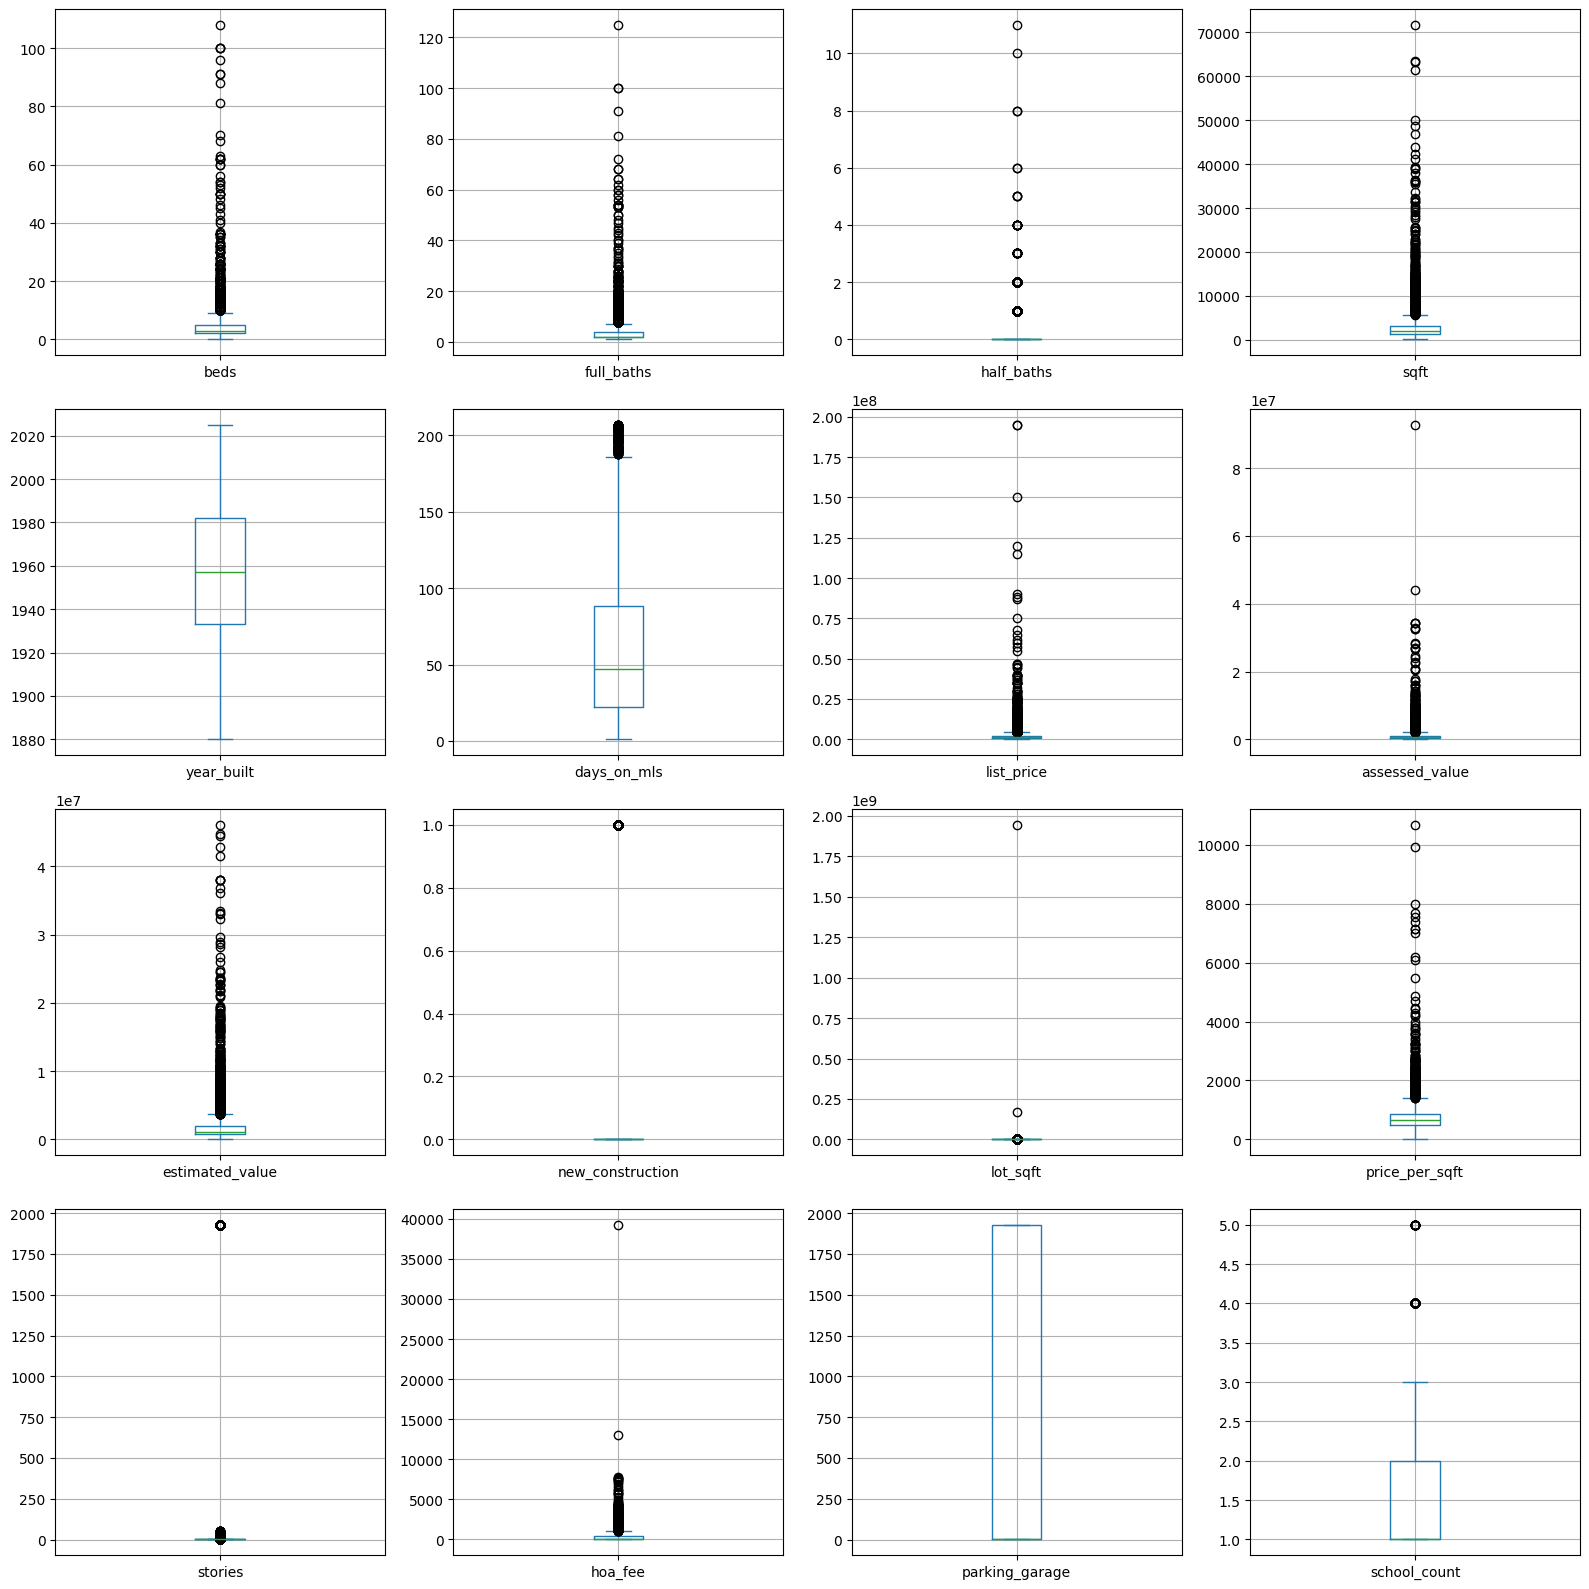

In [34]:
# Plot box chart
columns_to_plot = df_filtered.select_dtypes(include=['float64', 'float32', 'int64', 'int32']).columns
df_filtered[columns_to_plot].plot(kind='box', subplots=True, layout=(4, 4), grid=True, figsize=(16,16))
plt.tight_layout()
plt.show()


##### IQR to Detect and Quantify Number of Outliers:
It's obvious to see there are a lot of outliers existing in many numerical data columns. So I use Interquartile range to quantify the outliers in each columns.

In [35]:
def identify_outliers_iqr(df):
    outlier_columns = {}
    for col in df.select_dtypes(include=['float64', 'float32', 'int64', 'int32']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        if not outliers.empty:
            outlier_columns[col] = len(outliers)
    
    return outlier_columns

# Identify and quantify columns with outliers using IQR method
outlier_columns_iqr = identify_outliers_iqr(df_filtered)
outlier_columns_iqr

{'beds': 486,
 'full_baths': 600,
 'half_baths': 1882,
 'sqft': 679,
 'days_on_mls': 155,
 'list_price': 732,
 'assessed_value': 799,
 'estimated_value': 814,
 'new_construction': 358,
 'lot_sqft': 1328,
 'price_per_sqft': 441,
 'stories': 746,
 'hoa_fee': 883,
 'school_count': 119}

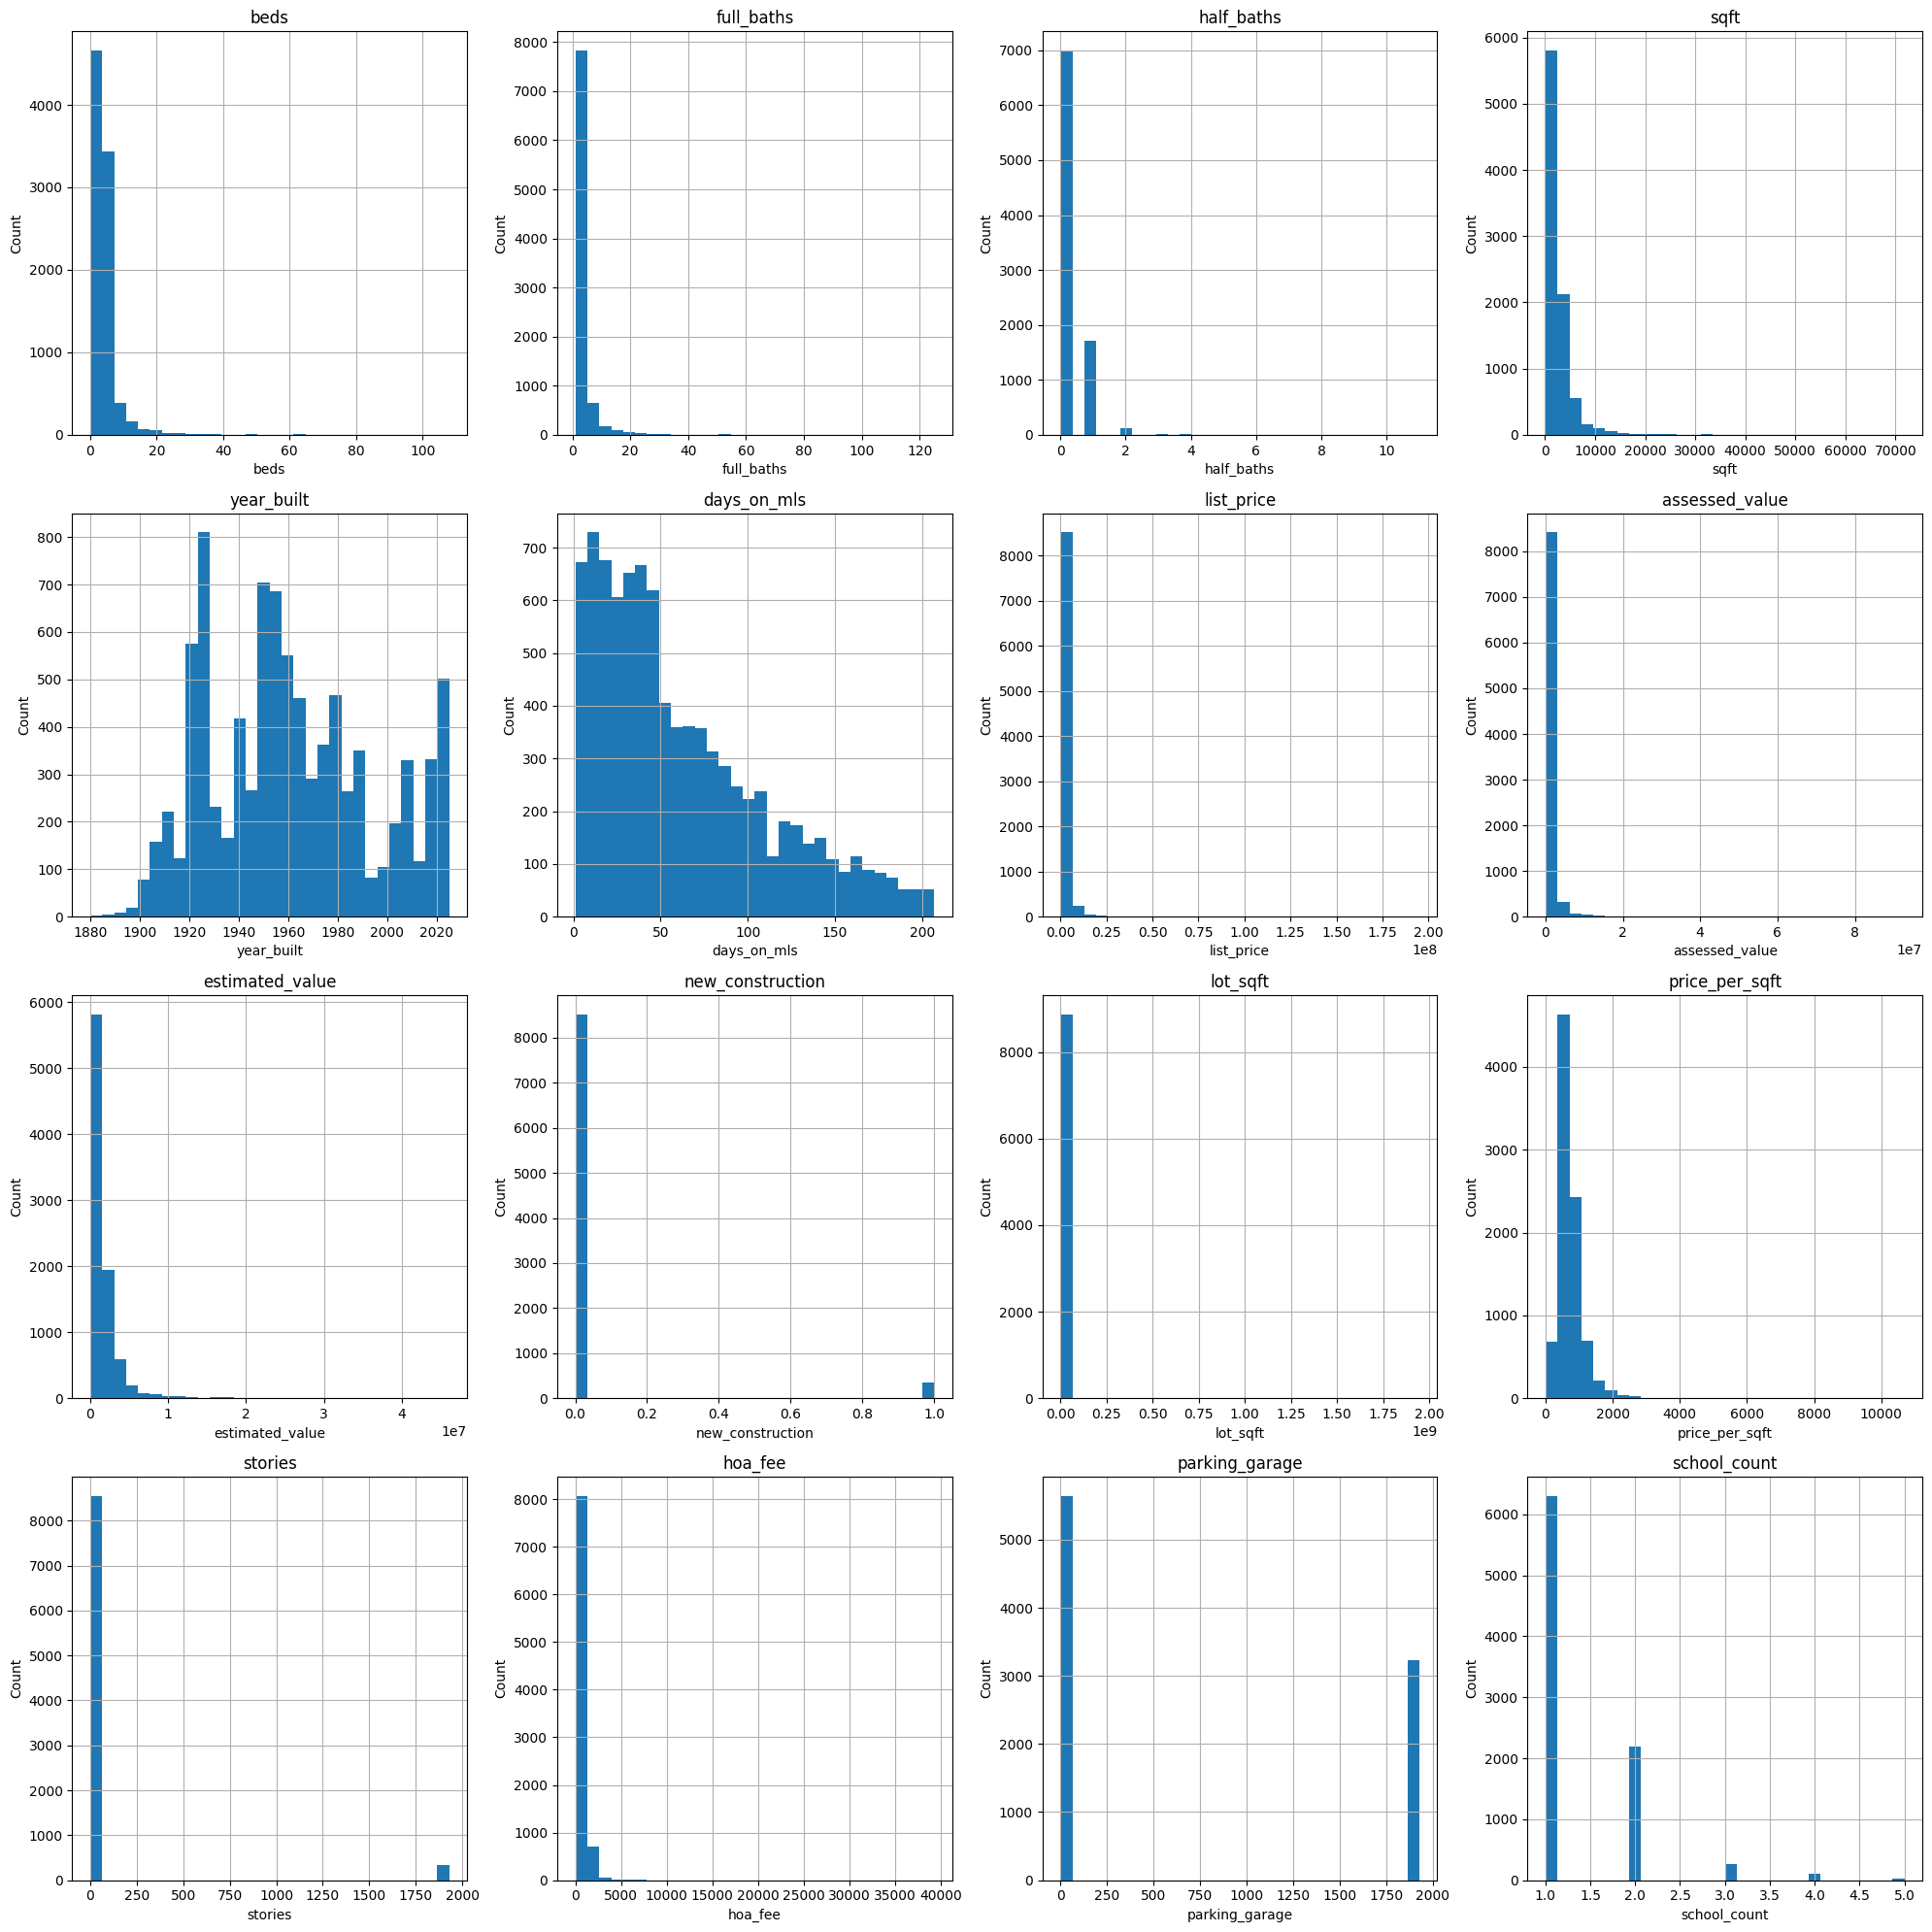

In [36]:
# Plot histogram
fig, axes = plt.subplots(4, 4, figsize = (20,20))
for ax, col in zip(axes.flatten(), columns_to_plot):
    ax.hist(df_filtered[col], bins=30)
    ax.set_title(f'{col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.grid(True)

plt.tight_layout()
plt.show()

**Right-skewed observed** <br>
All variables are right skewed and have a significant amount of outliers. I'll need to normalize the distribution and handle outliers later to reduce noises.

**Check Correlation and Multicollinearity**<br>
Looking into the correlation between each variable and detect multicollinearity

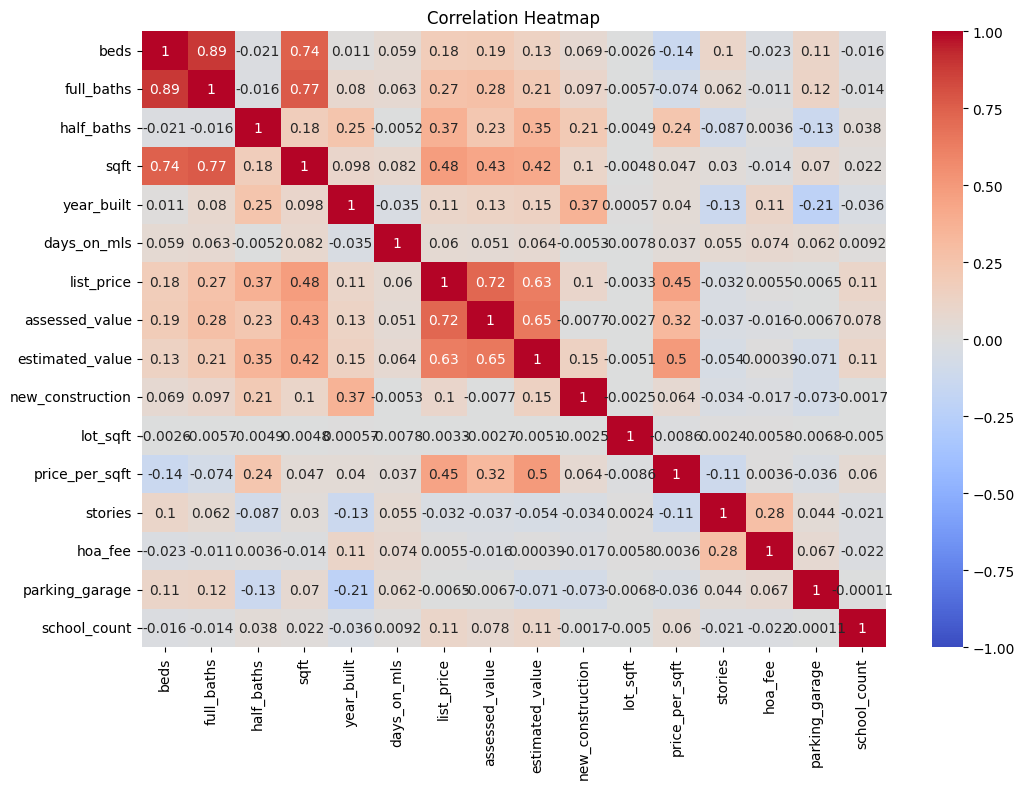

In [37]:
# Plot correlation matrix with heatmap
corr_matrix = df_filtered[columns_to_plot].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

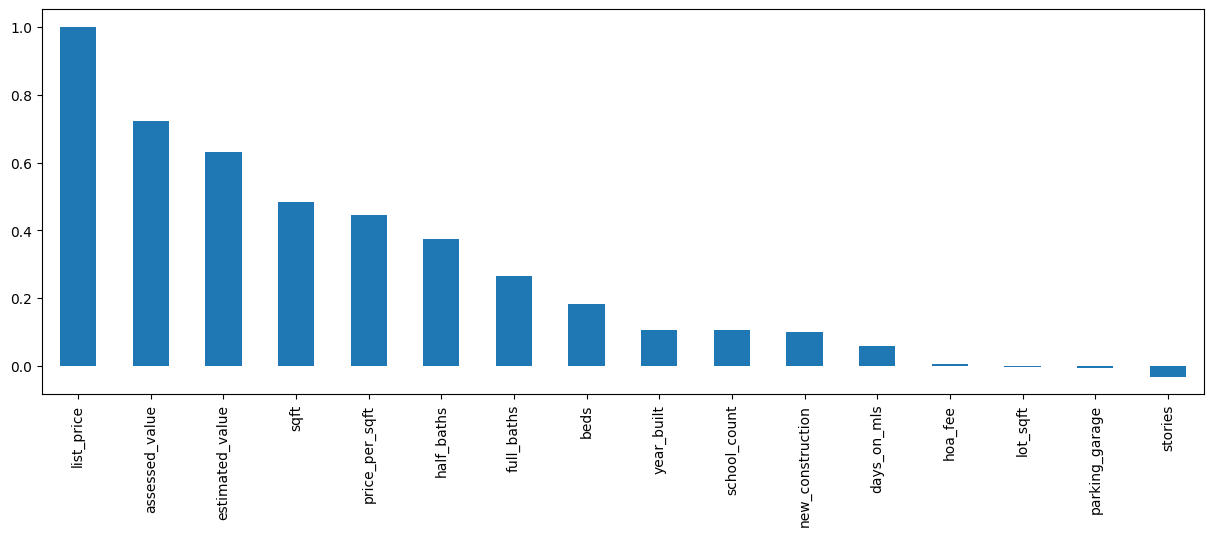

In [38]:
corr_matrix['list_price'].sort_values(ascending=False).plot.bar(figsize=(15,5))

##### Multicollinearity Treatment
From the heatmap, I noticed there's strong positive correlation between beds and full_baths as their correlation coefficient goes above 0.8, which indicates possible multicollinearity. To avoid multicollinearity, I would choose to use full_baths and drop the beds variable because it shows from the chart above that full_baths has a slightly higher correlation with list_price (correlation = 0.27) than beds (correlation = 0.18).

From the chart above, I found out price can be closely associated with assessed_value, estimated_value, sqft, price_per_sqft, half_baths. 

In [39]:
# drop beds columns to avoid multicollinearity
df_filtered = df_filtered.drop(columns=['beds'])


##### Log Transformation 
Apply log transformation to address right-skewed data and associated outliers, compressing large values and making outliers less extreme.

In [40]:
# perform log transform to normalize the data 
columns_to_log = [
    'full_baths', 'half_baths', 'sqft', 'days_on_mls', 
    'list_price', 'assessed_value', 'estimated_value', 
    'lot_sqft', 'price_per_sqft', 'stories', 'hoa_fee',
    'year_built', 'school_count'
]

for col in columns_to_log:
    df_filtered[f'{col}_log']  = np.log1p(df_filtered[col])  # log1p applies log(x + 1) to handle zero values

df_filtered.drop(columns = columns_to_log, inplace=True)

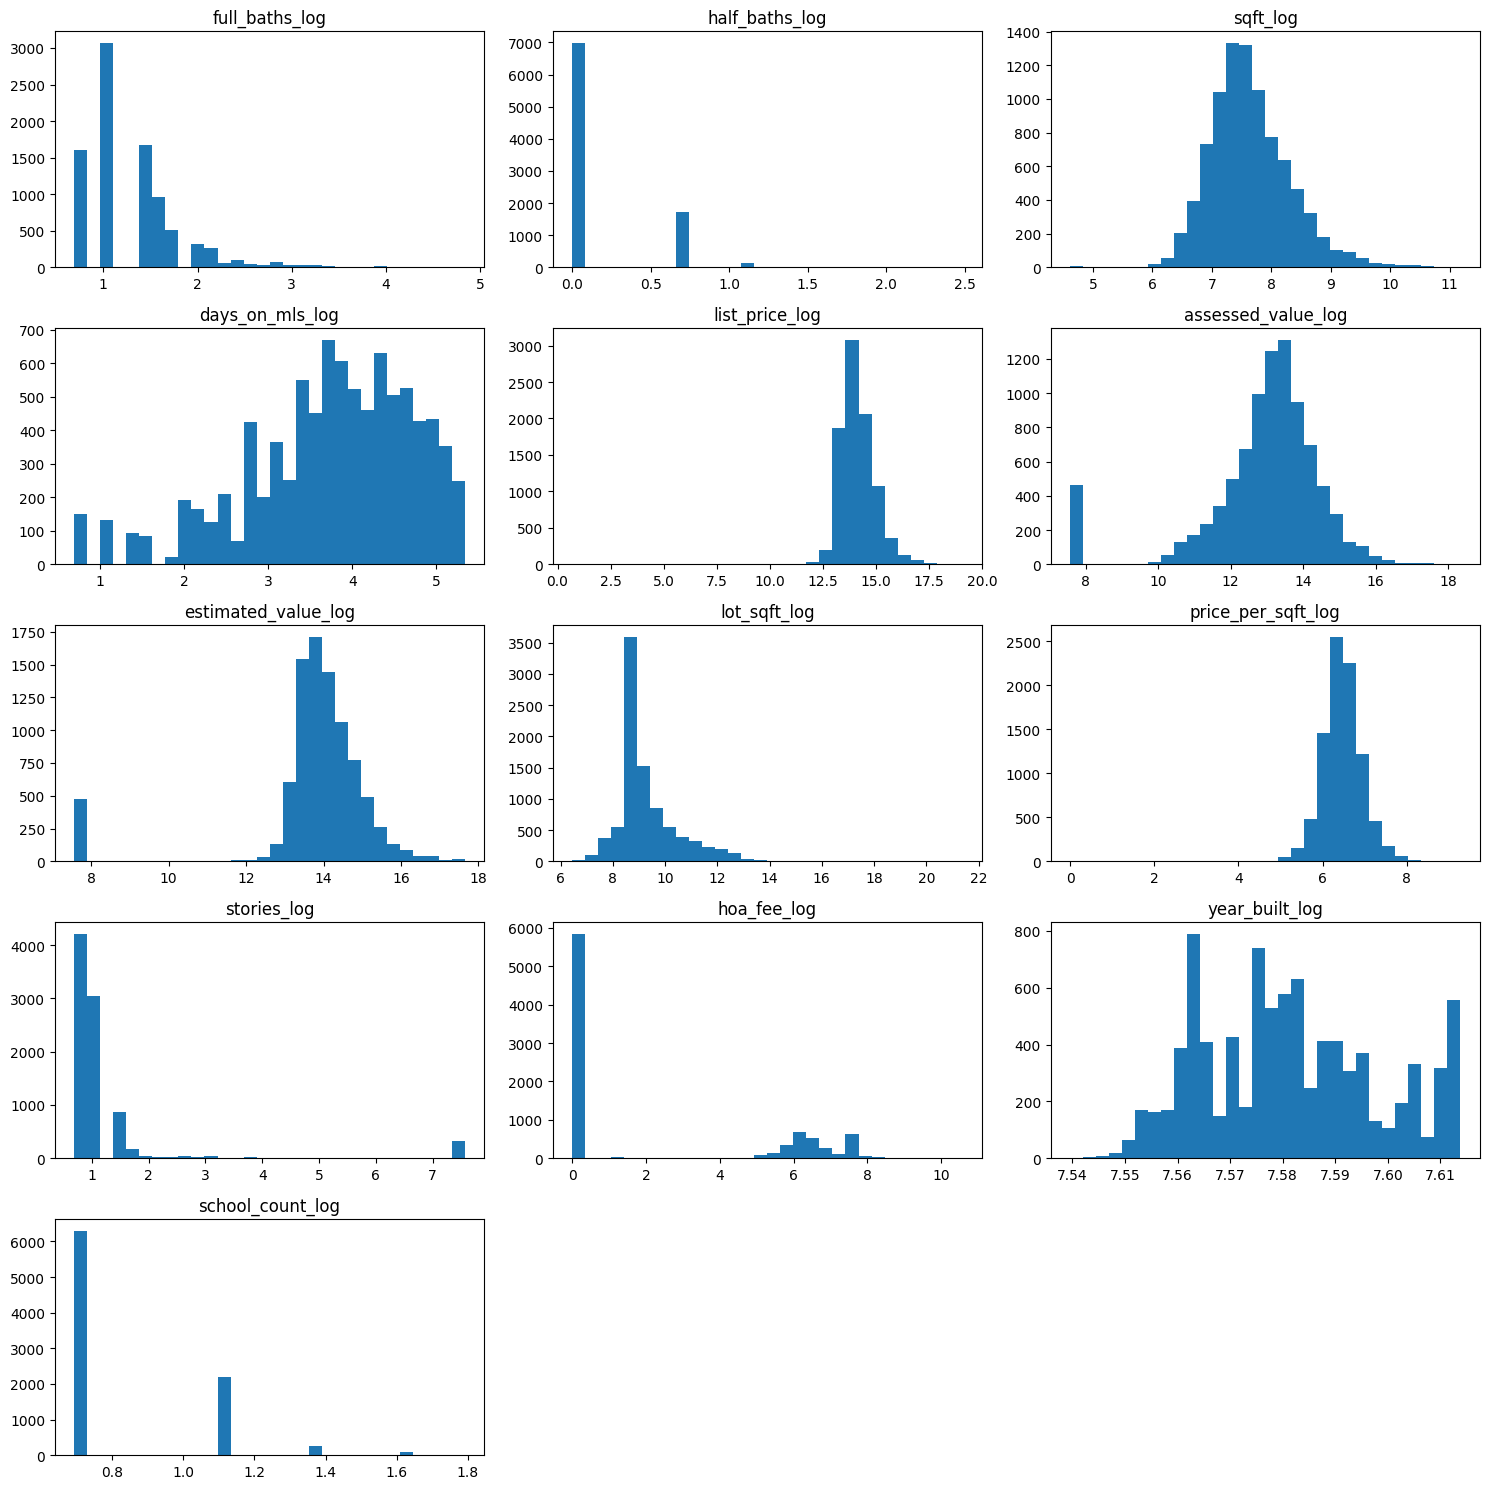

In [41]:
log_columns = [f'{col}_log' for col in columns_to_log]
num_cols = 3  
num_rows = (len(log_columns) // num_cols) + (1 if len(log_columns) % num_cols != 0 else 0)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
axes = axes.flatten() 
# Plot histograms for each log-transformed column
for i, col in enumerate(log_columns):
    axes[i].hist(df_filtered[col], bins=30)
    axes[i].set_title(col)
    
# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()


They're still a little bit skewed but much more better. I'm going to keep it for now. I will do the scaling to ensure all features contribute equally to the model before modeling step.

#### 5.5 One-hot Encoding for status, style, primary_neighborhood, county

In [42]:
# One-hot encoding categorical variables
categorical_columns = ['status', 'style', 'primary_neighborhood']
df_encoded = pd.get_dummies(df_filtered, columns=categorical_columns, drop_first=True)
one_hot_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[one_hot_cols] = df_encoded[one_hot_cols].astype(int)
df_encoded.head()

,new_construction,parking_garage,full_baths_log,half_baths_log,sqft_log,days_on_mls_log,list_price_log,assessed_value_log,estimated_value_log,lot_sqft_log,price_per_sqft_log,stories_log,hoa_fee_log,year_built_log,school_count_log,status_PENDING,style_COOP,style_DUPLEX_TRIPLEX,style_MOBILE,style_MULTI_FAMILY,style_SINGLE_FAMILY,style_TOWNHOMES,primary_neighborhood_Central LA,primary_neighborhood_Culver West,primary_neighborhood_Eastside LA,primary_neighborhood_Harbor,primary_neighborhood_Los Angeles,primary_neighborhood_Mclaughlin,primary_neighborhood_Mission Hills,primary_neighborhood_North Hills,primary_neighborhood_North Hollywood,primary_neighborhood_North Torrance,primary_neighborhood_North Valley,primary_neighborhood_Northeast LA,primary_neighborhood_Northridge,primary_neighborhood_Park West,primary_neighborhood_Silicon Beach,primary_neighborhood_South LA,primary_neighborhood_South Valley,primary_neighborhood_Southeast LA,primary_neighborhood_West Hills,primary_neighborhood_Westside LA
23,0,1928.0,1.098612,0.000000,6.965080,0.693147,13.710150,13.137153,13.666914,8.338067,6.747587,0.693147,0.0,7.568896,0.693147,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5602,0,1928.0,1.098612,0.000000,7.050123,4.262680,13.863349,13.589667,13.852449,8.418256,6.815640,0.693147,0.0,7.562161,1.098612,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7112,0,1928.0,1.386294,0.693147,8.160804,4.532599,15.710128,14.723425,15.681233,8.842460,7.550135,1.098612,0.0,7.577634,0.693147,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1733,0,1928.0,1.098612,0.000000,7.288244,2.197225,13.997832,13.492182,14.080027,8.557567,6.711740,0.693147,0.0,7.563720,0.693147,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2278,0,3.0,1.791759,0.000000,7.949444,1.609438,13.872836,13.204712,13.854732,8.824089,5.926926,1.098612,0.0,7.564757,0.693147,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### 6. Model Implementation and Evaluation
#### Split the data into Training and Test sets

In [43]:
# Train-test split
X = df_encoded.drop(columns=['list_price_log']) 
y = df_encoded['list_price_log'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set (X_train):", X_train.shape)
print("Training set (y_train):", y_train.shape)
print("Testing set (X_test):", X_test.shape)
print("Testing set (y_test):", y_test.shape)

Training set (X_train): (6213, 41)
Training set (y_train): (6213,)
Testing set (X_test): (2664, 41)
Testing set (y_test): (2664,)


#### Scaling
Scale the features before model training because the features are in different scale, centering the data by subtracting the mean and scaling it to unit variance <br>
I used standard scaling (Z-score), and it transforms features to have a mean of 0 and a standard deviation of 1

In [44]:
scaler = StandardScaler()
# Fit the scaler on the training set and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
# X_train_scaled.head()

#### Multiple Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [46]:
# Retrieve the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)
coef_df['Coefficient'] = coef_df['Coefficient'].apply(lambda x: f"{x:.4f}")

# Display the intercept and formatted coefficients
print(f"Intercept: {intercept:.4f}")
print("\nCoefficients:")
print(coef_df)


Intercept: 14.1407

Coefficients:
                                 Feature Coefficient
4                               sqft_log      0.5976
9                     price_per_sqft_log      0.4238
2                         full_baths_log      0.0497
19                   style_SINGLE_FAMILY      0.0491
18                    style_MULTI_FAMILY      0.0318
3                         half_baths_log      0.0267
8                           lot_sqft_log      0.0233
40      primary_neighborhood_Westside LA      0.0188
36         primary_neighborhood_South LA     -0.0174
31     primary_neighborhood_North Valley     -0.0166
0                       new_construction      0.0157
37     primary_neighborhood_South Valley     -0.0147
7                    estimated_value_log      0.0120
23      primary_neighborhood_Eastside LA     -0.0109
11                           hoa_fee_log     -0.0094
17                          style_MOBILE     -0.0093
6                     assessed_value_log      0.0091
16          

#### Summary from Regression
- Intercept: the baseline prediction for house prices would be e^14.1407 when all feature effects are not contributing
- High-Impact Features: The size of the property (sqft_log and price_per_sqft_log) and certain property types (single-family, multi-family) have the most substantial influence on the price.
- Neighborhood Influence: Some neighborhoods, such as Westside LA (positive) and South LA (negative), play a role in pricing, reflecting location desirability.
- Small Impacts: Many features, such as new_construction, hoa_fee_log, and various neighborhood indicators, have smaller but still relevant impacts on price.


#### Multiple Linear Regression Model Evaluation

In [47]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Training R^2: {train_r2:.4f}")
print(f"Testing R^2: {test_r2:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

Training R^2: 0.9621
Testing R^2: 0.9033
Training MSE: 0.0241
Testing MSE: 0.0709


#### Evaluation Summary
- On the test data, the model explains about 90.3% (r^2) of the variance in house prices, which indicates a strong performance.
- The slight drop in R² from training (96.2%) to testing (90.3%) suggests certain degree of overfitting, but this difference is relatively small, indicating that the model generalizes well to new data.
- The testing MSE of 0.0709 indicates that the model’s predictions are reasonably accurate
- Overall, the model stats show strong R² and low MSE and shows that the model is effective for predictions on this data

#### Lasso (L1 Regularization)

In [48]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Lasso model applying Grid Search with Cross-Validation
alpha_values = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, param_grid=alpha_values, cv=5, scoring='r2')
lasso_grid.fit(X_train_scaled, y_train)

# find the best Lasso model
best_lasso = lasso_grid.best_estimator_
lasso_best_alpha = lasso_grid.best_params_['alpha']
print(f"Best alpha: {lasso_best_alpha}")

y_test_pred_lasso = best_lasso.predict(X_test_scaled)
y_train_pred_lasso = best_lasso.predict(X_train_scaled)

Best alpha: 0.001


In [49]:
intercept = best_lasso.intercept_
coefficients = best_lasso.coef_
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)
coef_df['Coefficient'] = coef_df['Coefficient'].apply(lambda x: f"{x:.4f}")

# Display the intercept and formatted coefficients
print(f"Intercept: {intercept:.4f}")
print("\nCoefficients:")
print(coef_df)

Intercept: 14.1407

Coefficients:
                                 Feature Coefficient
4                               sqft_log      0.6030
9                     price_per_sqft_log      0.4259
2                         full_baths_log      0.0489
19                   style_SINGLE_FAMILY      0.0387
40      primary_neighborhood_Westside LA      0.0272
3                         half_baths_log      0.0254
18                    style_MULTI_FAMILY      0.0221
8                           lot_sqft_log      0.0186
0                       new_construction      0.0151
21       primary_neighborhood_Central LA      0.0143
7                    estimated_value_log      0.0119
35    primary_neighborhood_Silicon Beach      0.0118
11                           hoa_fee_log     -0.0098
17                          style_MOBILE     -0.0093
6                     assessed_value_log      0.0091
14                        status_PENDING     -0.0054
16                  style_DUPLEX_TRIPLEX      0.0047
5           

#### Summary from Lasso Model:
- Intercept: same as multiple linear regression
- Key Predictors: sqft_log, price_per_sqft_log, and full_baths_log have the largest positive impacts, suggesting that size, price per square foot, and the number of full baths are primary drivers of house prices.
- Neighborhood Influence: Properties in certain neighborhoods like Westside LA and Central LA have higher predicted prices, while some neighborhoods like South LA and North Valley slightly decrease price.
- Simplicity: Lasso has set many features to zero, reducing model complexity and focusing on the most significant predictors, which can improve interpretability and prevent overfitting.


In [50]:
lasso_train_r2 = r2_score(y_train, y_train_pred_lasso)
lasso_test_r2 = r2_score(y_test, y_test_pred_lasso)
lasso_train_mse = mean_squared_error(y_train, y_train_pred_lasso)
lasso_test_mse = mean_squared_error(y_test, y_test_pred_lasso)
print("Lasso Model")
print(f"Lasso_Training R^2: {train_r2:.4f}")
print(f"Lasso_Testing R^2: {test_r2:.4f}")
print(f"Lasso_Training MSE: {train_mse:.4f}")
print(f"Lasso_Testing MSE: {test_mse:.4f}")

Lasso Model
Lasso_Training R^2: 0.9621
Lasso_Testing R^2: 0.9033
Lasso_Training MSE: 0.0241
Lasso_Testing MSE: 0.0709


Lasso Evaluation Summary:
- High Accuracy: With over 90% of variance explained and low MSE, the Lasso model performs well in predicting house prices.
- Regularization Benefit: The Lasso model’s regularization has likely improved its ability to generalize by reducing coefficients for less impactful features.


#### Ridge (L2 Regularization)

In [51]:
# Ridge model applying Grid Search with Cross-Validation
ridge = Ridge(max_iter=10000)
ridge_grid = GridSearchCV(ridge, param_grid=alpha_values, cv=5, scoring='r2')
ridge_grid.fit(X_train_scaled, y_train)

# finding best Ridge model
best_ridge = ridge_grid.best_estimator_
ridge_best_alpha = ridge_grid.best_params_['alpha']
print(f"Best alpha: {ridge_best_alpha}")

y_train_pred_ridge = best_ridge.predict(X_train_scaled)
y_test_pred_ridge = best_ridge.predict(X_test_scaled)

Best alpha: 1


In [52]:
intercept = best_ridge.intercept_
coefficients = best_ridge.coef_
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)
coef_df['Coefficient'] = coef_df['Coefficient'].apply(lambda x: f"{x:.4f}")

# Display the intercept and formatted coefficients
print(f"Intercept: {intercept:.4f}")
print("\nCoefficients:")
print(coef_df)

Intercept: 14.1407

Coefficients:
                                 Feature Coefficient
4                               sqft_log      0.5971
9                     price_per_sqft_log      0.4236
2                         full_baths_log      0.0500
19                   style_SINGLE_FAMILY      0.0493
18                    style_MULTI_FAMILY      0.0319
3                         half_baths_log      0.0268
8                           lot_sqft_log      0.0234
40      primary_neighborhood_Westside LA      0.0213
0                       new_construction      0.0157
36         primary_neighborhood_South LA     -0.0147
31     primary_neighborhood_North Valley     -0.0142
7                    estimated_value_log      0.0120
37     primary_neighborhood_South Valley     -0.0115
23      primary_neighborhood_Eastside LA     -0.0095
11                           hoa_fee_log     -0.0094
17                          style_MOBILE     -0.0093
6                     assessed_value_log      0.0091
16          

#### Summary from Ridge Model:
- Intercept: same as multiple linear regression
- Key Predictors: The main drivers are sqft_log and price_per_sqft_log, with some additional impact from full_baths_log, style_SINGLE_FAMILY, and lot_sqft_log.
- Neighborhood Influence: Neighborhoods like Westside LA positively impact prices, while South LA and North Valley neighborhoods show slight price reductions.
- Impact of Regularization: Ridge regularization has shrunk coefficients for less impactful predictors while preserving key variables. This approach helps prevent overfitting, making the model more generalizable.

In [53]:
ridge_train_r2 = r2_score(y_train, y_train_pred_ridge)
ridge_test_r2 = r2_score(y_test, y_test_pred_ridge)
ridge_train_mse = mean_squared_error(y_train, y_train_pred_ridge)
ridge_test_mse = mean_squared_error(y_test, y_test_pred_ridge)
print("Ridge Model")
print(f"Ridge_Training R^2: {ridge_train_r2:.4f}")
print(f"Ridge_Testing R^2: {ridge_test_r2:.4f}")
print(f"Ridge_Training MSE: {ridge_train_mse:.4f}")
print(f"Ridge_Testing MSE: {ridge_test_mse:.4f}")

Ridge Model
Ridge_Training R^2: 0.9621
Ridge_Testing R^2: 0.9033
Ridge_Training MSE: 0.0241
Ridge_Testing MSE: 0.0709


#### Ridge Evaluation Summary:
- High Accuracy: The Ridge model’s high R² values and low MSE suggest it is highly accurate at predicting house prices.
- Regularization Benefits: Ridge regression reduces the impact of less important features, which helps prevent overfitting

### 7. Model Comparison

In [54]:
pd.set_option('display.float_format', '{:.6f}'.format)
pd.DataFrame([[test_r2, lasso_test_r2, ridge_test_r2],[test_mse, lasso_test_mse, ridge_test_mse]], 
             columns= ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
             index = ['r2', 'MSE'])

,Linear Regression,Lasso Regression,Ridge Regression
r2,0.903350,0.903189,0.903338
MSE,0.070941,0.071059,0.070950


#### Model Selection Summary:
- R² (Coefficient of Determination): the difference between the models here is very small (all are around 0.903), suggesting they explain the variance similarly.
- MSE: all three models perform similarly in terms of prediction error<br>

**Since R² and MSE are almost identical across all three models, choose based on additional factors**:
- Linear Regression: Choose linear regression when simplicity is key and there’s no clear need for penalizing coefficients
- Lasso Regression (Best for Sparsity): Choose Lasso when prioritizing a simpler model with fewer less-impactful features (coefficients closer to zero).
- Ridge Regression (Best for Collinearity): Choose Ridge when suspecting collinearity between predictors but want to retain all features

**My Model Choice**: Since I prefer features simplicity, I choose Lasso as my final model

In [55]:
pd.set_option('display.float_format', '{:.4f}'.format)
coef_results = pd.DataFrame({
    'features': X_train.columns,
    'Linear Regression': model.coef_,
    'Lasso Regression': best_lasso.coef_,
    'Ridge Regression': best_ridge.coef_
})

coef_results = coef_results.set_index('features')
coef_results



,Linear Regression,Lasso Regression,Ridge Regression
features,,,
new_construction,0.0157,0.0151,0.0157
parking_garage,-0.0003,-0.0000,-0.0003
full_baths_log,0.0497,0.0489,0.0500
half_baths_log,0.0267,0.0254,0.0268
sqft_log,0.5976,0.6030,0.5971
days_on_mls_log,0.0055,0.0046,0.0055
assessed_value_log,0.0091,0.0091,0.0091
estimated_value_log,0.0120,0.0119,0.0120
lot_sqft_log,0.0233,0.0186,0.0234


#### High-Impact Features
1. **sqft_log**: <br>
This feature has a large positive coefficient across all models (Linear: 0.5976, Lasso: 0.6030, Ridge: 0.5971), indicating that larger square footage is consistently a strong predictor of price.
2. **price_per_sqft_log**: <br>
Similarly, price_per_sqft_log has a large positive coefficient (Linear: 0.4238, Lasso: 0.4259, Ridge: 0.4236), reflecting its importance in predicting house prices.
3. **style_SINGLE_FAMILY and style_MULTI_FAMILY**: <br>
style_SINGLE_FAMILY and style_MULTI_FAMILY both show moderate positive coefficients across models, suggesting that these property types tend to increase the price, with single-family homes generally having a slightly larger effect.
Features Affected by Lasso Regularization <be>

- Lasso Regression effectively reduces less impactful features, creating a sparser model by setting some coefficients to near zero. 
- Ridge Regression shrinks coefficients but keeps all features, providing a balance between handling multicollinearity and retaining predictors.

#### 8. Future Improvement
**Feature Engineering and Selection**: While current models leverage various features, future iterations could benefit from additional feature engineering to capture complex interactions within the dataset. For instance, refining categorical encodings for features like nearby_schools and neighborhoods could lead to more informative predictors, especially by clustering similar neighborhoods or aggregating school ratings. <br>
**Experimenting with Advanced Models**: While linear, Ridge, and Lasso regression models perform very well in thie project case and are able to provide interpretability, exploring non-linear models like XGBboosting, decision trees, and random forests models may capture complex patterns in the data. These models could potentially improve predictive accuracy by better representing interactions and non-linear relationships.<br>
**Model Ensembling**: Creating an ensemble of Ridge and Lasso models, along with other non-linear models like random forests, could stabilize predictions and capture diverse data patterns, providing improved accuracy and reliability.<br>
**Incorporating Domain Knowledge and Temporal Data**: Incorporating temporal and seasonal trends, or considering time-series analysis could make predictions more aligned with current market dynamics. Also, leveraging domain knowledge may also enrich the feature set and improve predictive capabilities. <br>
**Expanding Data Sources**: Expanding the data to include other publicly available sources could also increase model context and provide insights into external factors
